<a href="https://colab.research.google.com/github/uligt/capstone/blob/main/EDA_esf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

## 1. Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from pandas.api.types import CategoricalDtype
import warnings
drive.mount('/content/drive',force_remount=True)
warnings.filterwarnings('ignore')

Mounted at /content/drive


## 2. Get Data

In [ ]:
# We will export the information to our variables, to be merged, used and analyzed
data_path = "/content/drive/MyDrive/Colab Notebooks/MBD/capgemini/data/"
density = pd.read_excel(data_path + "DensityReports_500k.xlsx").drop("ReportID",axis=1) #remove id since we will not use it
incidents = pd.read_excel(data_path + "HistoricalIncidents.xlsx").drop("IncidentID",axis=1) #remove id since we will not use it
attributes = pd.read_excel(data_path + "ProductAttributes.xlsx")
scorecard = pd.read_excel(data_path + "SupplierScorecard.xlsx")

## 3. EDA Process

We will try to solve the following questions using EDA:
- What is the most frequent garmet?
- What is the most used configuration (suggested items per package) for each of the garmet
- When and how many reports are we sending per day
- How many units we are suggesting per package per day
- Hoy many units our providers are sending?
- Which will be our best provider?
- What is the trend of our provider through the year
- How is the good and bad package distributed?

### 3.1 See Data Integrity

### 3.1.1 Null Values

#### 3.1.1.1 Density Report Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SupplierName            500000 non-null  object        
 1   DateOfReport            500000 non-null  datetime64[ns]
 2   GarmentType             500000 non-null  object        
 3   Material                500000 non-null  object        
 4   ProductReference        489923 non-null  object        
 5   ProposedUnitsPerCarton  500000 non-null  int64         
 6   ProposedFoldingMethod   500000 non-null  object        
 7   ProposedLayout          490047 non-null  object        
 8   PackagingQuality        500000 non-null  object        
 9   DataLabeled             500000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(7)
memory usage: 34.8+ MB


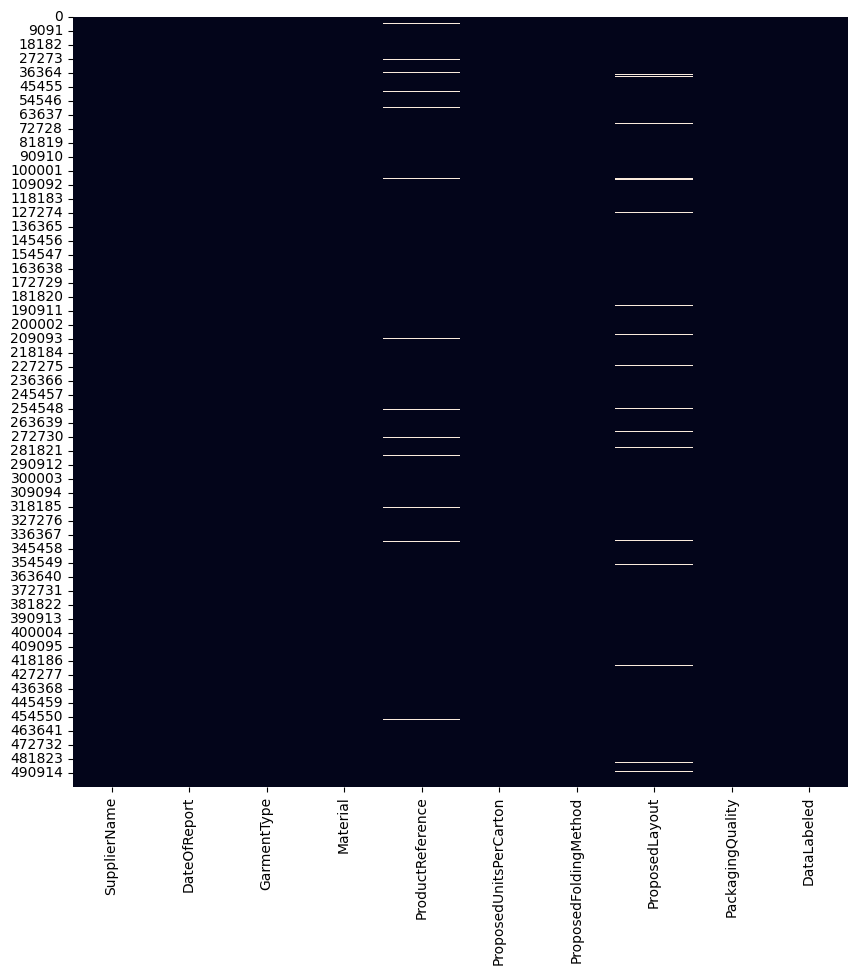

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(density.isna(),cbar=False,ax=ax)
density.info(verbose=True,show_counts=True)

- Few lines with `NaN` values that we would need to replace or remove

In [ ]:
pd.Series(density.isna().sum(),name='NA Values').sort_values(ascending=False)

ProductReference          10077
ProposedLayout             9953
DateOfReport                  0
SupplierName                  0
Material                      0
GarmentType                   0
ProposedUnitsPerCarton        0
ProposedFoldingMethod         0
PackagingQuality              0
DataLabeled                   0
Name: NA Values, dtype: int64

#### 3.1.1.2 Attributes Report Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductReference  5000 non-null   object 
 1   GarmentType       5000 non-null   object 
 2   Material          5000 non-null   object 
 3   ProductName       5000 non-null   object 
 4   Size              5000 non-null   object 
 5   Collection        5000 non-null   object 
 6   Weight            5000 non-null   float64
dtypes: float64(1), object(6)
memory usage: 273.6+ KB


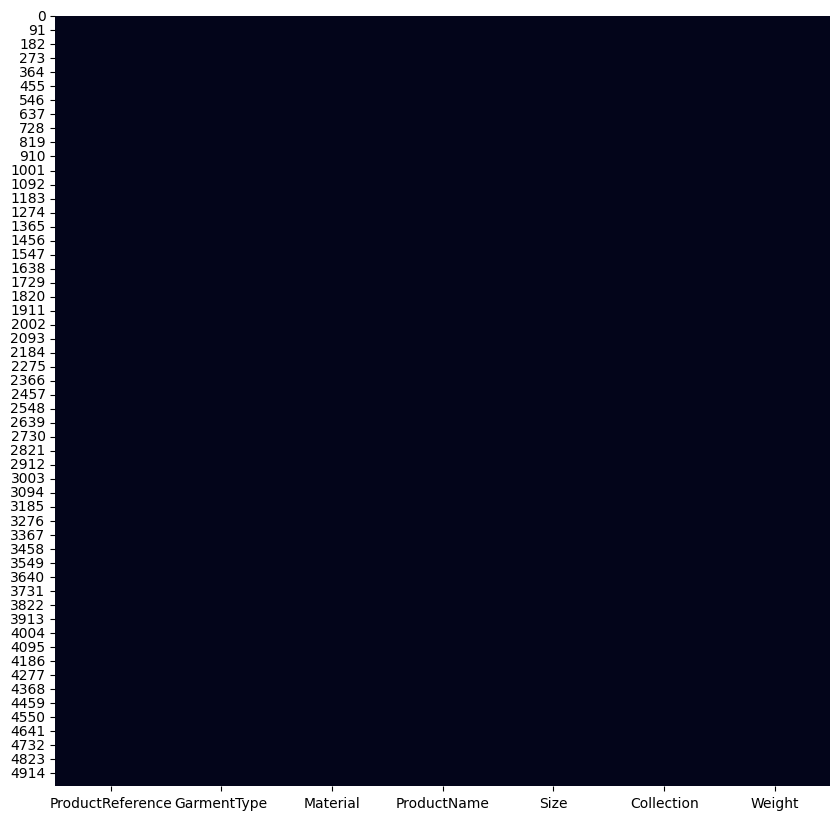

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(attributes.isna(),cbar=False,ax=ax)
attributes.info(verbose=True,show_counts=True)

#### 3.1.1.3 Incidents Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateOfIncident    10000 non-null  datetime64[ns]
 1   SupplierName      10000 non-null  object        
 2   ProductReference  10000 non-null  object        
 3   IssueDescription  10000 non-null  object        
 4   ResolutionStatus  10000 non-null  object        
 5   CostImpact        10000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 468.9+ KB


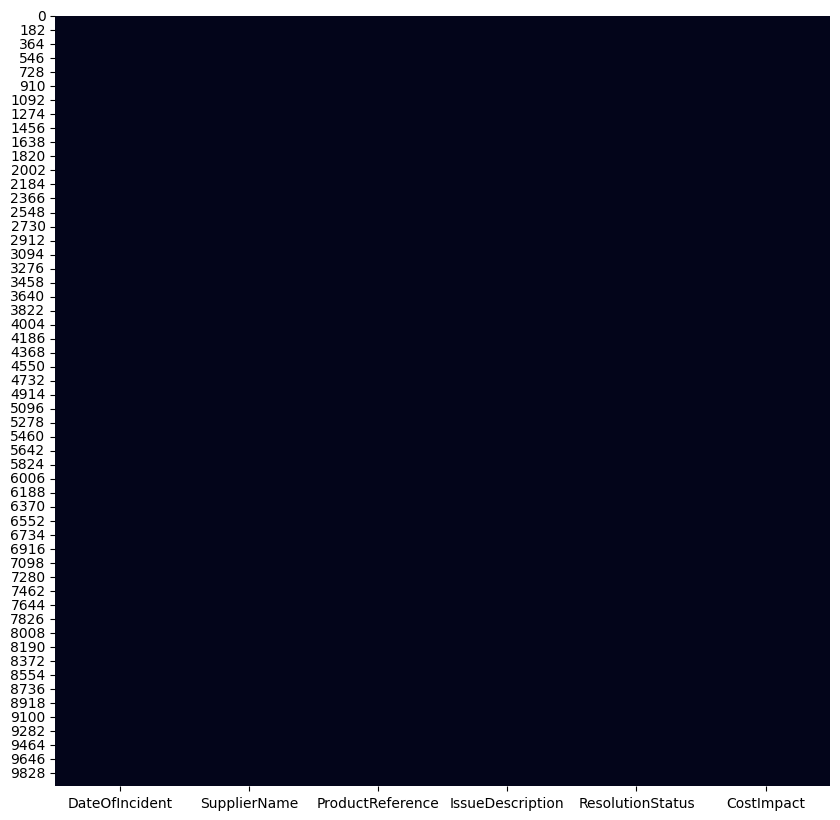

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(incidents.isna(),cbar=False,ax=ax)
incidents.info(verbose=True,show_counts=True)

#### 3.1.1.4 Scorecard Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SupplierName       10000 non-null  object        
 1   ReportDate         10000 non-null  datetime64[ns]
 2   AdherenceScore     10000 non-null  int64         
 3   NumberOfReminders  10000 non-null  int64         
 4   OnTimeDelivery     10000 non-null  object        
 5   CostSavings        10000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 468.9+ KB


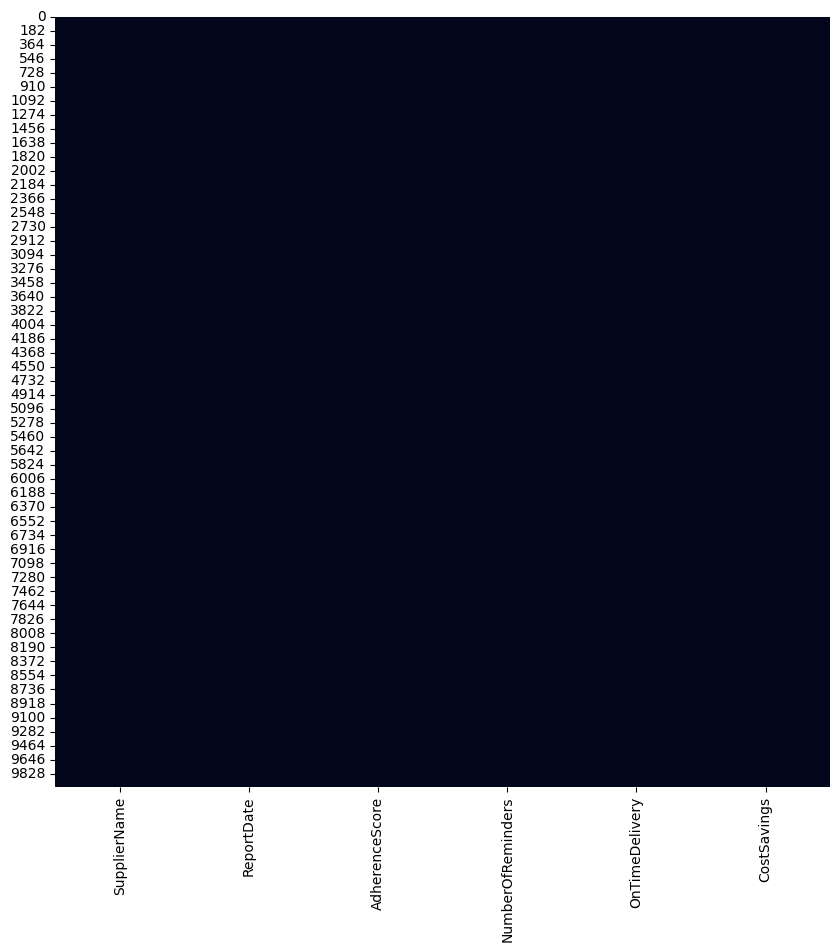

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(scorecard.isna(),cbar=False,ax=ax)
scorecard.info(verbose=True,show_counts=True)

### 3.2 Univariate Analysis

#### 3.2.1 Density Report

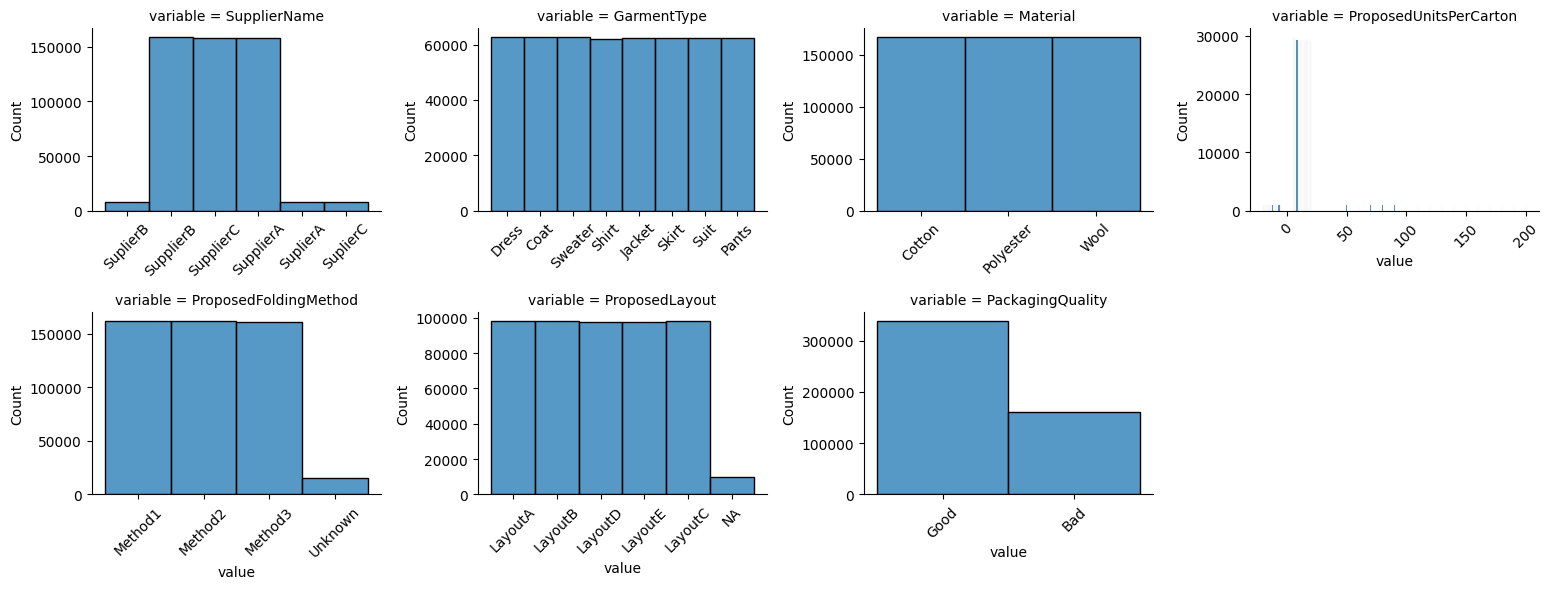

In [ ]:
# Density report values
g = sns.FacetGrid(density.drop(['DateOfReport','ProductReference','DataLabeled'],axis=1).fillna('NA').melt(),col='variable',margin_titles=True,col_wrap=4,sharex=False,sharey=False,aspect=1.3)
g.map_dataframe(sns.histplot,x='value')

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()

- `SupplierName`: Has some mislabeled data
- `GarmentType`: There seems to be no issues, data is uniformly distributed
- `Material`: There seems to be no issues, data is uniformly distributed
- `ProposedUnitsPerCarton`: There seems to be negative values (which is not supposed to be), and some values that are overthe normal distribution of data. We would need to clean this data.
- `ProposedFoldingMethod`: Methods 1 - 3 seem to be evenly distributed, the `Unknown` value its not clear which type of fold was used, I'm assuming that provider did not follow any folding method and its unknownd what method they used
- `ProposedLayout`: There seems to be no issues, data is uniformly distributed, there are NA or null values, we could assume that there was no proposal sent to client
- `PackagingQuality`: There are significant more items with `Good` package quality than `Bad`

#### 3.2.2 Attributes

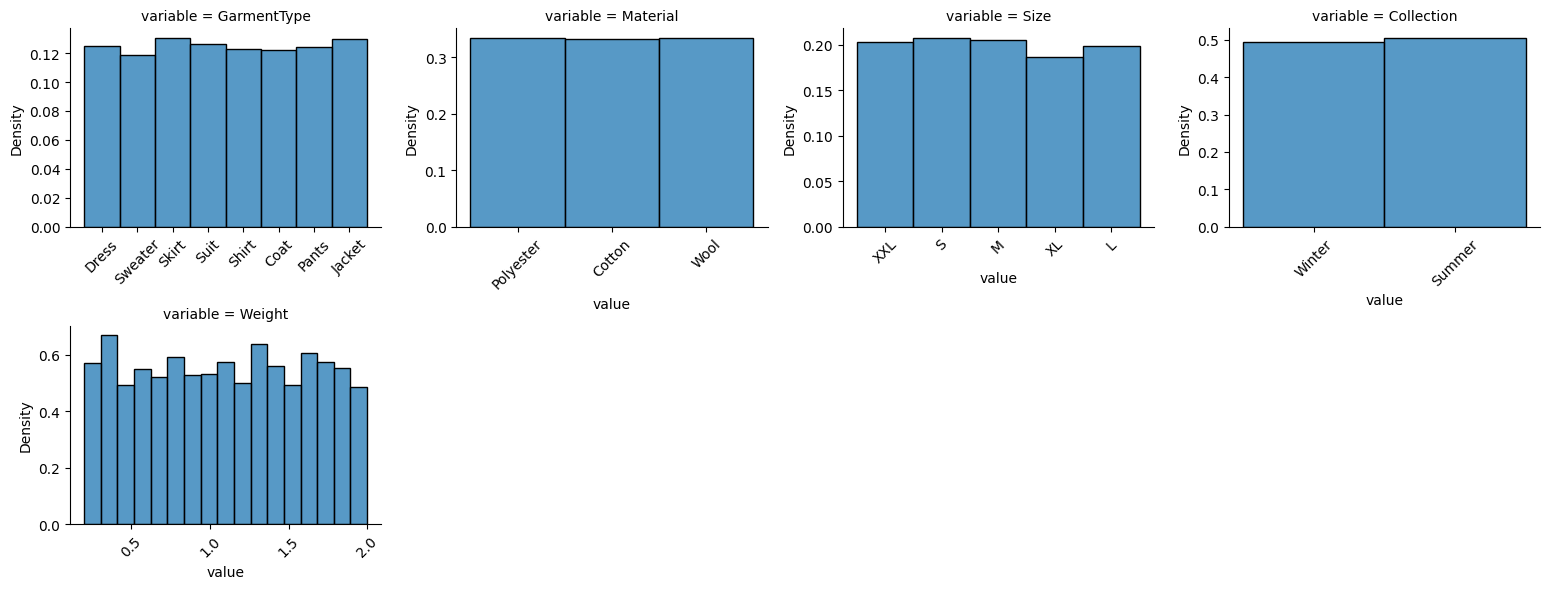

In [ ]:
# Attributes
g = sns.FacetGrid(attributes.drop(['ProductReference','ProductName'],axis=1).fillna('NA').melt(),col='variable',margin_titles=True,col_wrap=4,sharex=False,sharey=False,aspect=1.3)
g.map_dataframe(sns.histplot,x='value',stat='density')

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()

- `GarmentType`: There seems to be no issues, data is uniformly distributed
- `Material`: There seems to be no issues, data is uniformly distributed
- `Size`: There seems to be no issues, data is uniformly distributed
- `Collection`: There seems to be no issues, data is uniformly distributed
- `Weight`: There seems to be no issues, data is uniformly distributed

#### 3.2.3 Scorecard

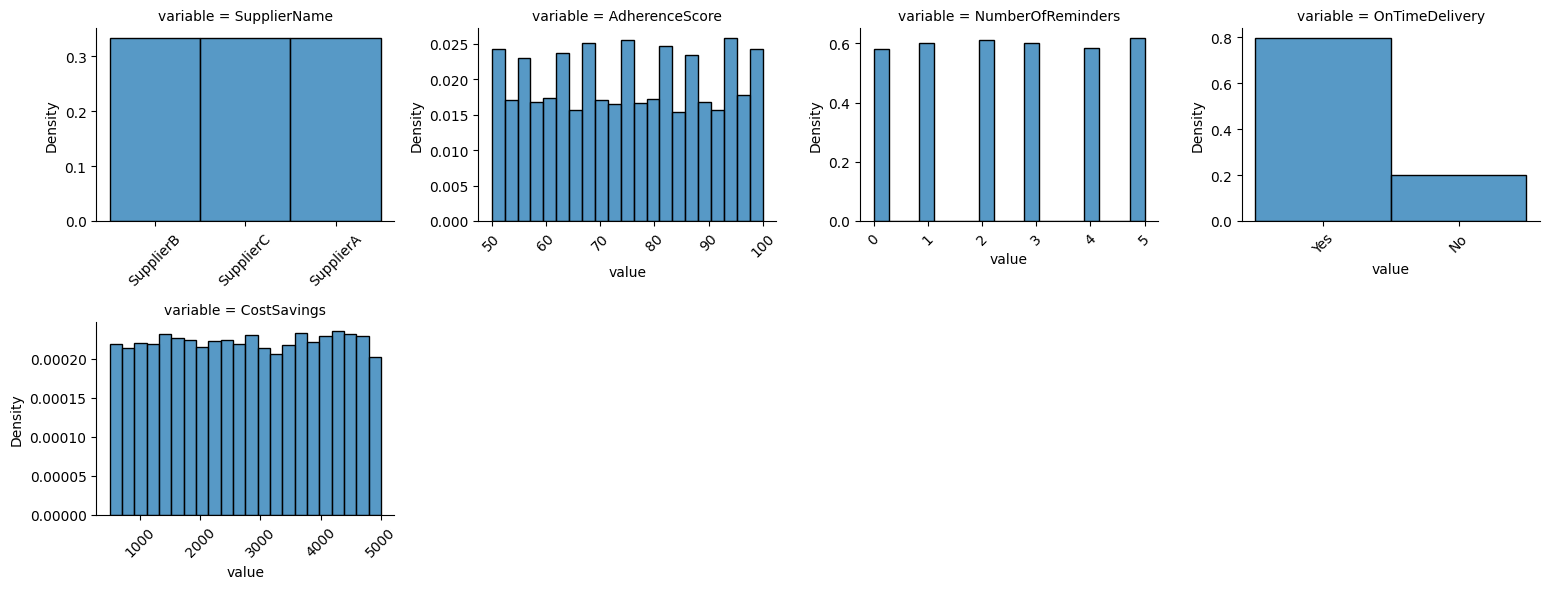

In [ ]:
# Scorecard
g = sns.FacetGrid(scorecard.drop(['ReportDate'],axis=1).fillna('NA').melt(),col='variable',margin_titles=True,col_wrap=4,sharex=False,sharey=False,aspect=1.3)
g.map_dataframe(sns.histplot,x='value',stat='density')

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()

- `SupplierName`: There seems to be no issues, data is uniformly distributed
- `AdherenceScore`: There seems to be no issues, data is uniformly distributed
- `NumberOfReminders`: There seems to be no issues, data is uniformly distributed
- `OnTimeDelivery`: There seems to be no issues, orders seem to arrive on time than late
- `CostSavings`: There seems to be no issues, data follows an uniform distribution

#### 3.2.4 Incidents

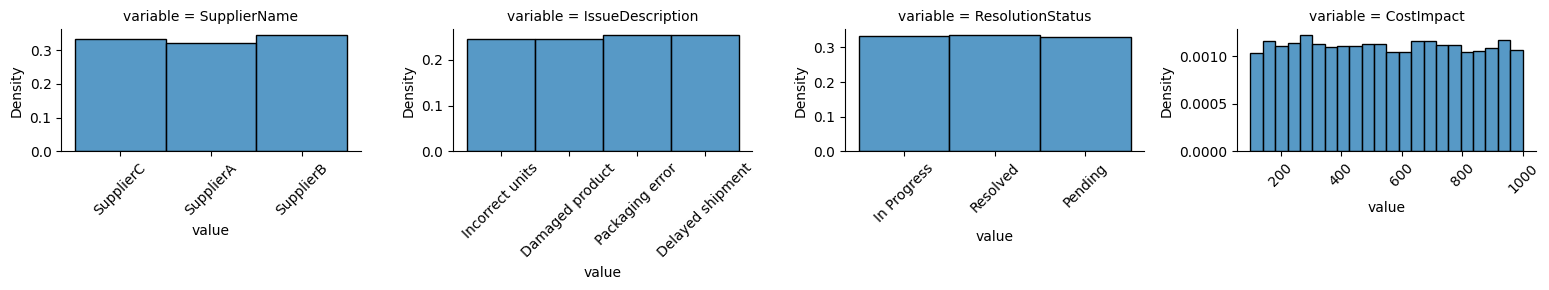

In [ ]:
# Incidents
g = sns.FacetGrid(incidents.drop(['ProductReference','DateOfIncident'],axis=1).fillna('NA').melt(),col='variable',margin_titles=True,col_wrap=4,sharex=False,sharey=False,aspect=1.3)
g.map_dataframe(sns.histplot,x='value',stat='density')

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

plt.tight_layout()

- `SupplierName`: There seems to be no issues, data is uniformly distributed
- `IssueDescription`: There seems to be no issues, data is uniformly distributed
- `ResolutionStatus`: There seems to be no issues, data is uniformly distributed
- `CostImpact`: There seems to be no issues, data is uniformly distributed

### 3.3 Cleaning and Enrichment

#### 3.3.1 Saving Datasets

In [ ]:
# Fallback just in case
density_og = density.copy()
attributes_og = attributes.copy()
incidents_og = incidents.copy()
scorecard_og = scorecard.copy()

#### 3.3.2 Cleaning Functions

In [ ]:
def negatives_to_positives(value:float|int) -> float|int:
  """
  Changes the values of negative to positive. It does not alter the abs value
  """
  if value < 0:
    return value * -1
  else:
    return value

#### 3.3.3 Density Dataset Cleaning

In [ ]:
density['ProposedUnitsPerCarton'] = density['ProposedUnitsPerCarton'].apply(negatives_to_positives)
density['SupplierName'].replace({'SuplierB':'SupplierB','SuplierC':'SupplierC','SuplierA':'SupplierA'},inplace=True)
density['DateOfReport'] = pd.DatetimeIndex(density['DateOfReport'])
scorecard['ReportDate'] = pd.DatetimeIndex(scorecard['ReportDate'])

#### 3.3.4 Enrich Data

In [ ]:
#Categorical Variables
dow = CategoricalDtype(categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)
month = CategoricalDtype(categories=['January','February','March','April','May','June','July','August','September','October','November','December'],ordered=True)

density['DoW'] = density['DateOfReport'].dt.day_name().astype(dow)
density['Month'] = density['DateOfReport'].dt.month_name().astype(month)
density['Year'] = density['DateOfReport'].dt.year
density['Quarter'] = density['DateOfReport'].dt.quarter

scorecard['DoW'] = scorecard['ReportDate'].dt.day_name().astype(dow)
scorecard['Month'] = scorecard['ReportDate'].dt.month_name().astype(month)
scorecard['Year'] = scorecard['ReportDate'].dt.year
scorecard['Quarter'] = scorecard['ReportDate'].dt.quarter

### 3.4 Multi-variate Analysis

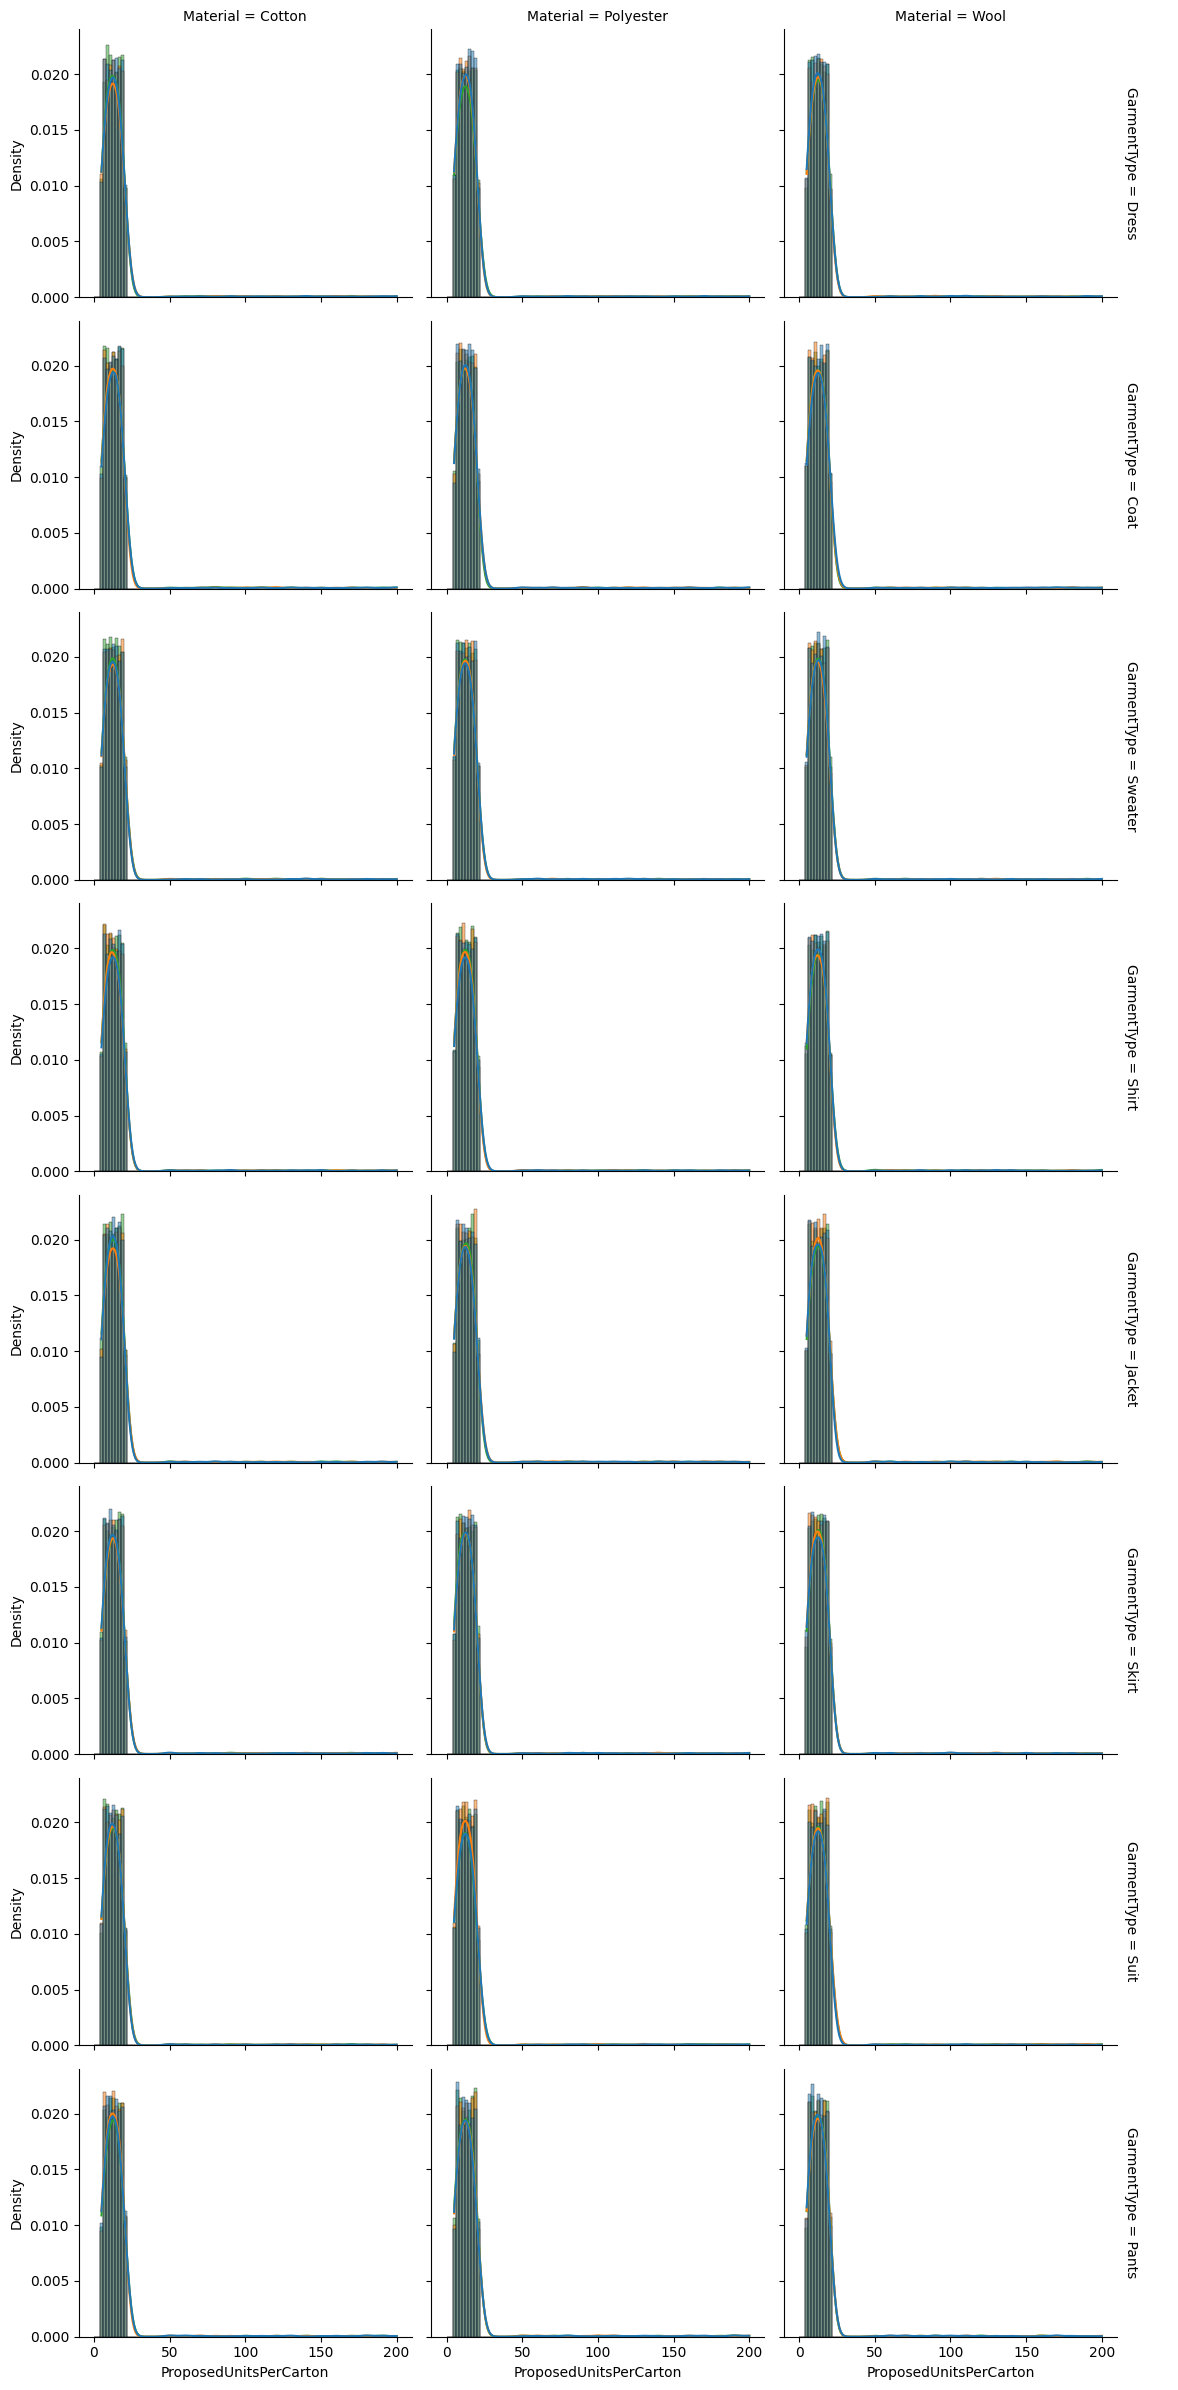

In [ ]:
g = sns.FacetGrid(density.drop(['DateOfReport','ProductReference','DoW','Month','Year','Quarter'],axis=1),row='GarmentType',col='Material',margin_titles=True,sharex=True,sharey=True,aspect=1.3)
g.map_dataframe(sns.histplot,x='ProposedUnitsPerCarton',hue='SupplierName',bins=np.linspace(0,48,25),stat='density',kde=True)
g.add_legend()

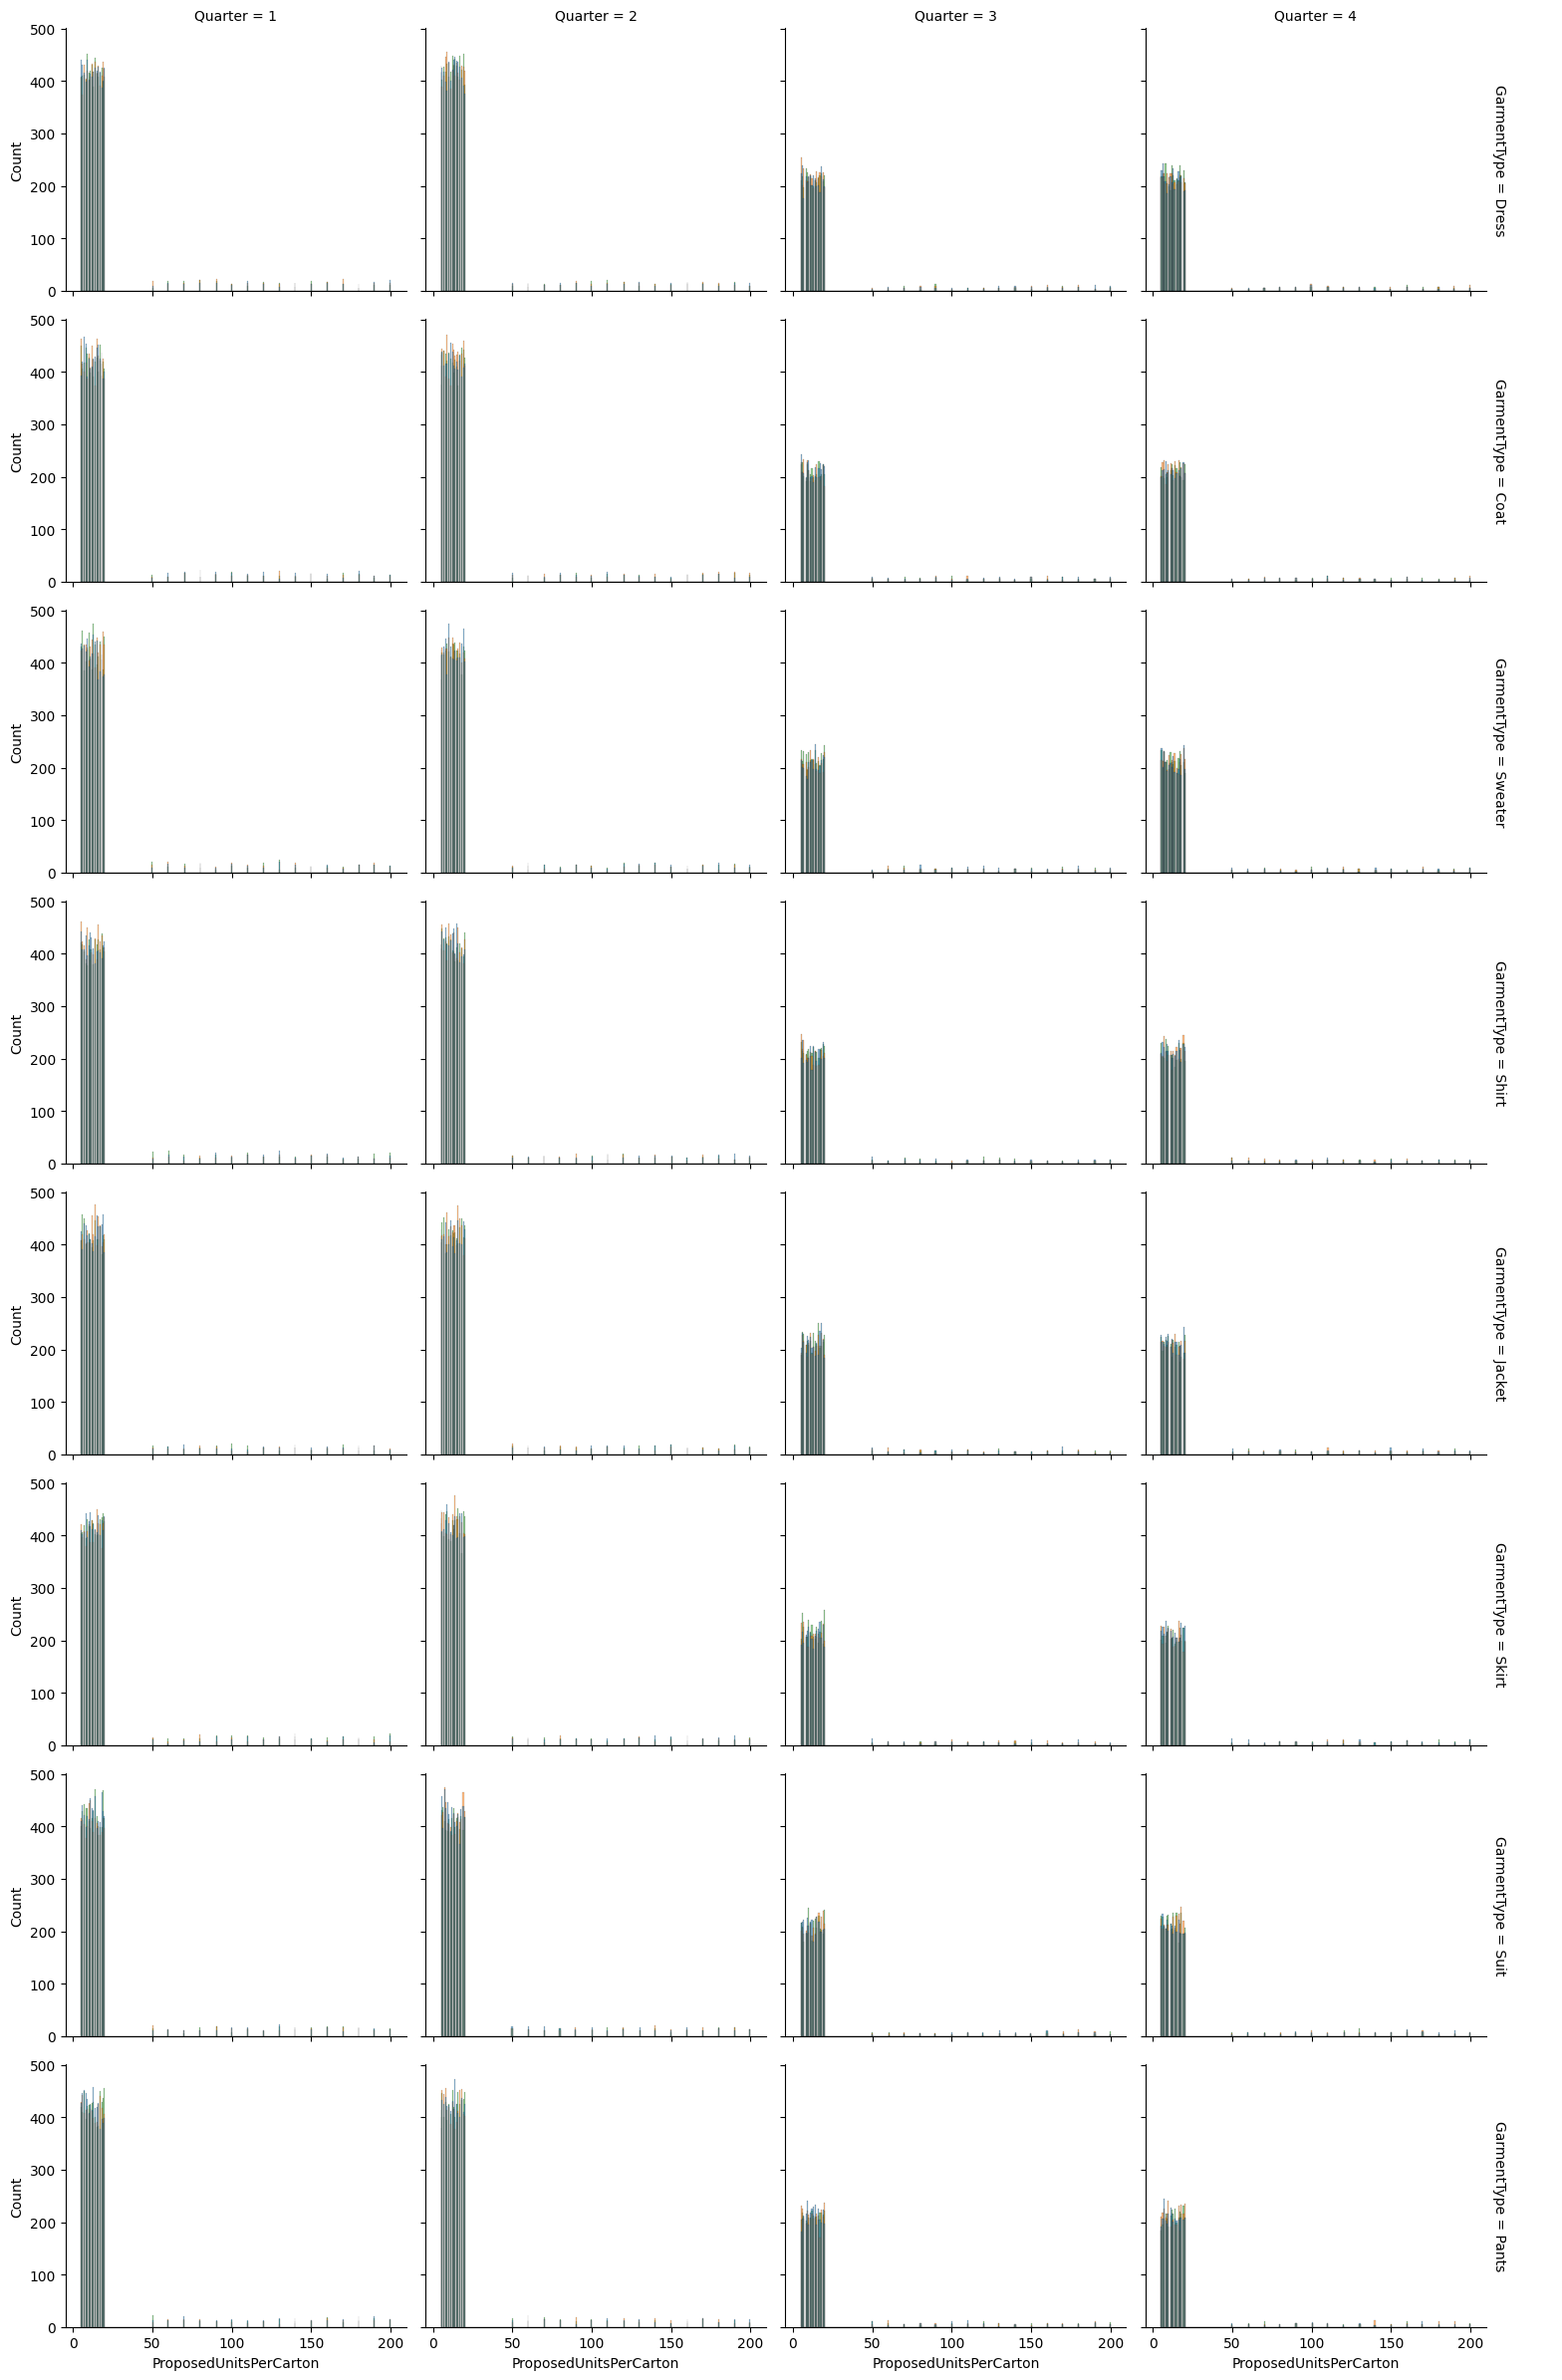

In [ ]:
g = sns.FacetGrid(density.drop(['DateOfReport','ProductReference','DoW','Month','Year'],axis=1),row='GarmentType',col='Quarter',margin_titles=True,sharex=True,sharey=True,aspect=1.3)
g.map_dataframe(sns.histplot,x='ProposedUnitsPerCarton',hue='SupplierName')
g.add_legend()

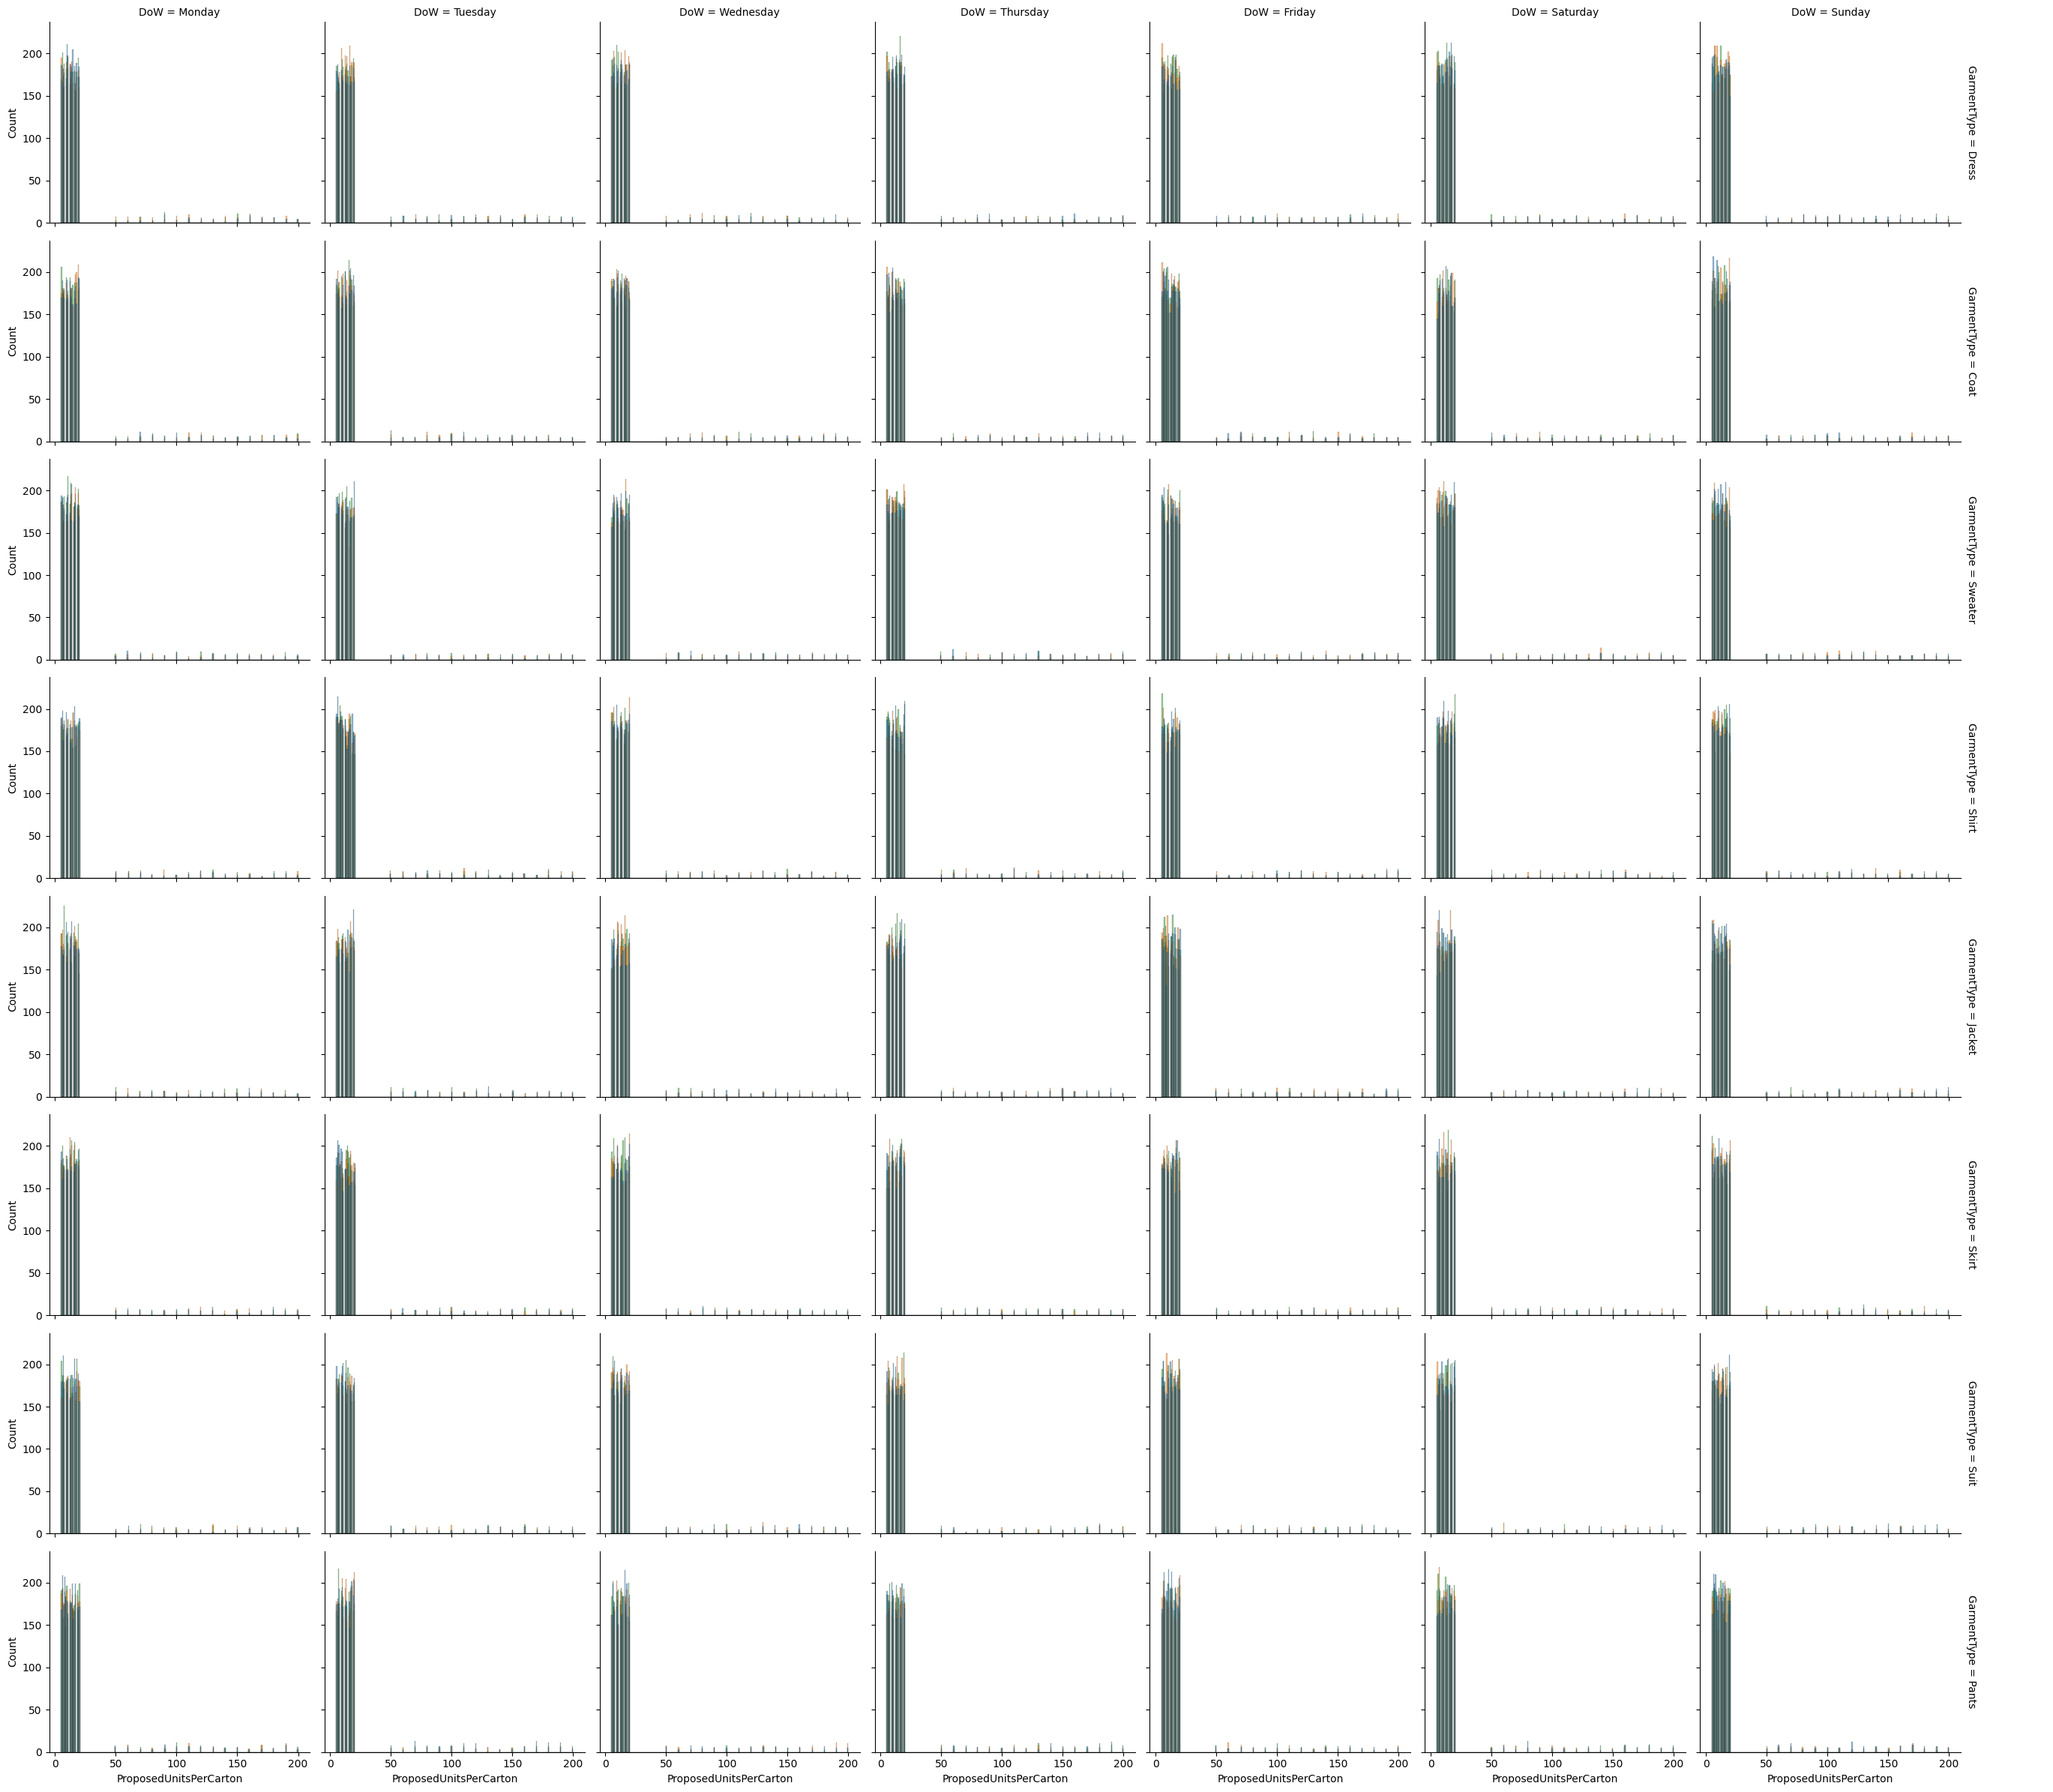

In [ ]:
g = sns.FacetGrid(density.drop(['DateOfReport','ProductReference'],axis=1),row='GarmentType',col='DoW',margin_titles=True,sharex=True,sharey=True,aspect=1.3)
g.map_dataframe(sns.histplot,x='ProposedUnitsPerCarton',hue='SupplierName')
g.add_legend()

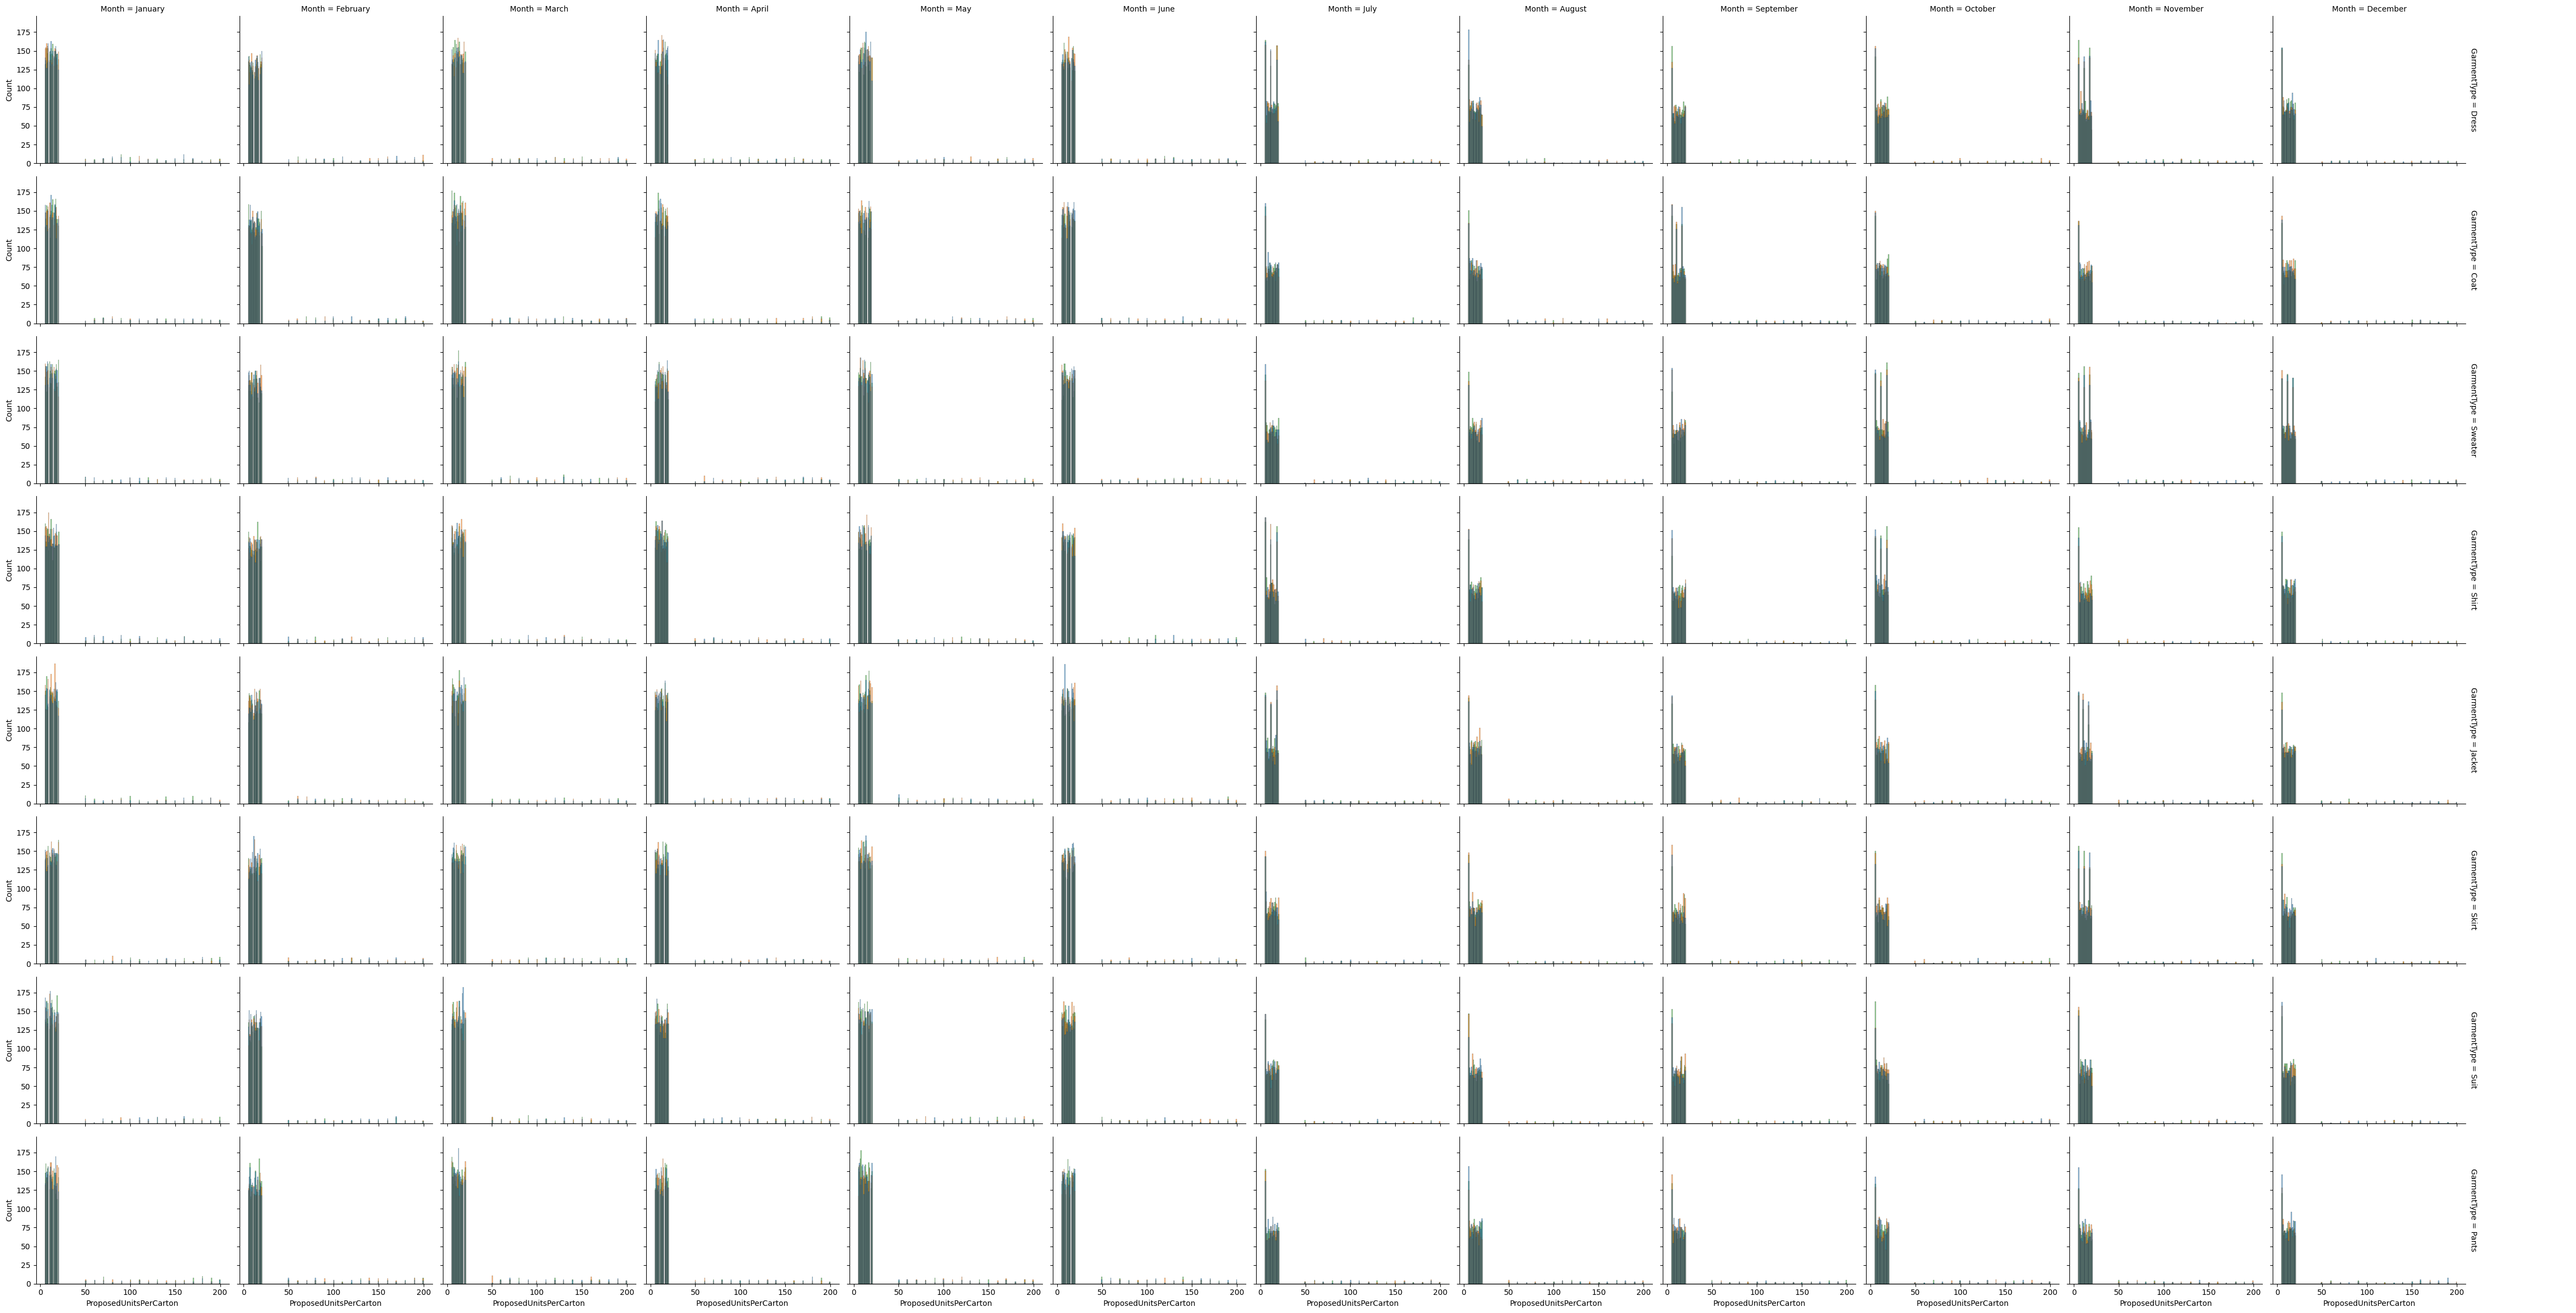

In [ ]:
g = sns.FacetGrid(density.drop(['DateOfReport','ProductReference'],axis=1),row='GarmentType',col='Month',margin_titles=True,sharex=True,sharey=True,aspect=1.3)
g.map_dataframe(sns.histplot,x='ProposedUnitsPerCarton',hue='SupplierName')
g.add_legend()

Text(0.5, 0.98, 'Reports Sent Per Day')

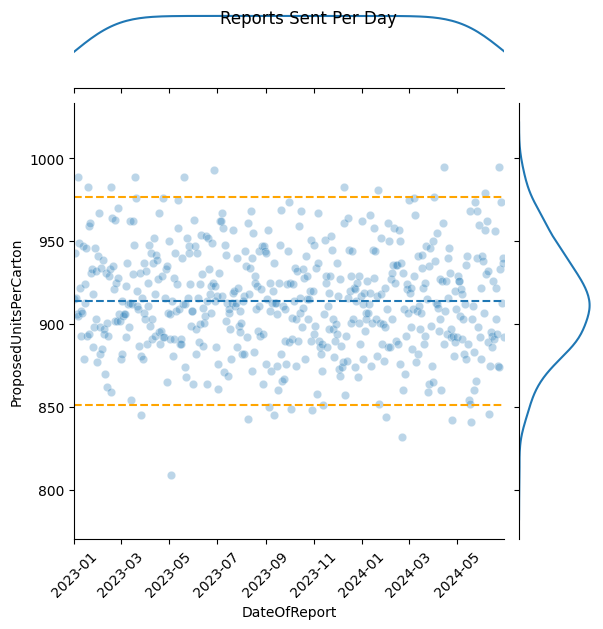

In [ ]:
temp = density.groupby(['DateOfReport'],as_index=False).count()
g = sns.JointGrid(temp,x='DateOfReport',y='ProposedUnitsPerCarton',xlim=(temp['DateOfReport'].min(),temp['DateOfReport'].max()))
g.plot_joint(sns.scatterplot,alpha=0.3)
g.plot_marginals(sns.kdeplot)
g.ax_joint.xaxis.set_ticklabels(g.ax_joint.get_xticklabels(),rotation=45)
mean = np.float32(temp['ProposedUnitsPerCarton'].mean())
std = np.float32(temp['ProposedUnitsPerCarton'].std())
g.ax_joint.hlines(mean,temp['DateOfReport'].min(),temp['DateOfReport'].max(),linestyles='dashed',label='Average')
g.ax_joint.hlines(std * 2 + mean,temp['DateOfReport'].min(),temp['DateOfReport'].max(),linestyles='dashed',label='Average',color='orange')
g.ax_joint.hlines(std * -2 + mean,temp['DateOfReport'].min(),temp['DateOfReport'].max(),linestyles='dashed',label='Average',color='orange')
g.fig.suptitle("Reports Sent Per Day")

Text(0.5, 0.98, 'Reports Sent Per Day to Each Provider')

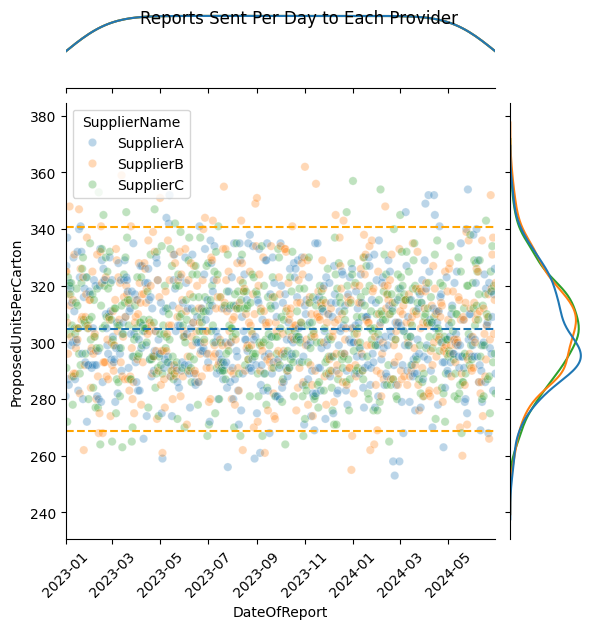

In [ ]:
temp = density.groupby(['DateOfReport','SupplierName'],as_index=False).count()
g = sns.JointGrid(temp,x='DateOfReport',y='ProposedUnitsPerCarton',hue='SupplierName',xlim=(temp['DateOfReport'].min(),temp['DateOfReport'].max()))
g.plot_joint(sns.scatterplot,alpha=0.3)
g.plot_marginals(sns.kdeplot)
g.ax_joint.xaxis.set_ticklabels(g.ax_joint.get_xticklabels(),rotation=45)
mean = np.float32(temp['ProposedUnitsPerCarton'].mean())
std = np.float32(temp['ProposedUnitsPerCarton'].std())
g.ax_joint.hlines(mean,temp['DateOfReport'].min(),temp['DateOfReport'].max(),linestyles='dashed',label='Average')
g.ax_joint.hlines(std * 2 + mean,temp['DateOfReport'].min(),temp['DateOfReport'].max(),linestyles='dashed',label='Average',color='orange')
g.ax_joint.hlines(std * -2 + mean,temp['DateOfReport'].min(),temp['DateOfReport'].max(),linestyles='dashed',label='Average',color='orange')
g.fig.suptitle("Reports Sent Per Day to Each Provider")

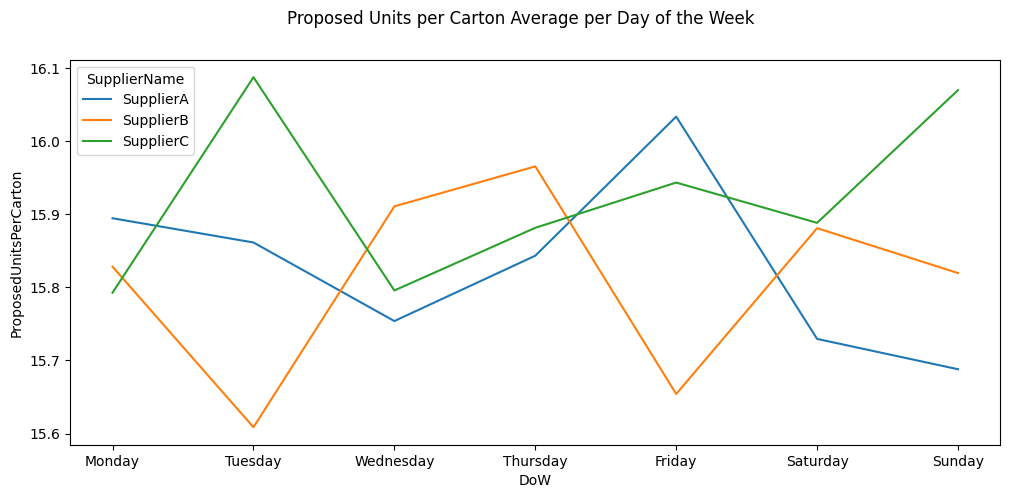

In [ ]:
fig,ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=density.groupby(['SupplierName','DoW'],as_index=False).mean(numeric_only=True),x='DoW',y='ProposedUnitsPerCarton',hue='SupplierName',ax=ax)
fig.suptitle("Proposed Units per Carton Average per Day of the Week")
plt.show()

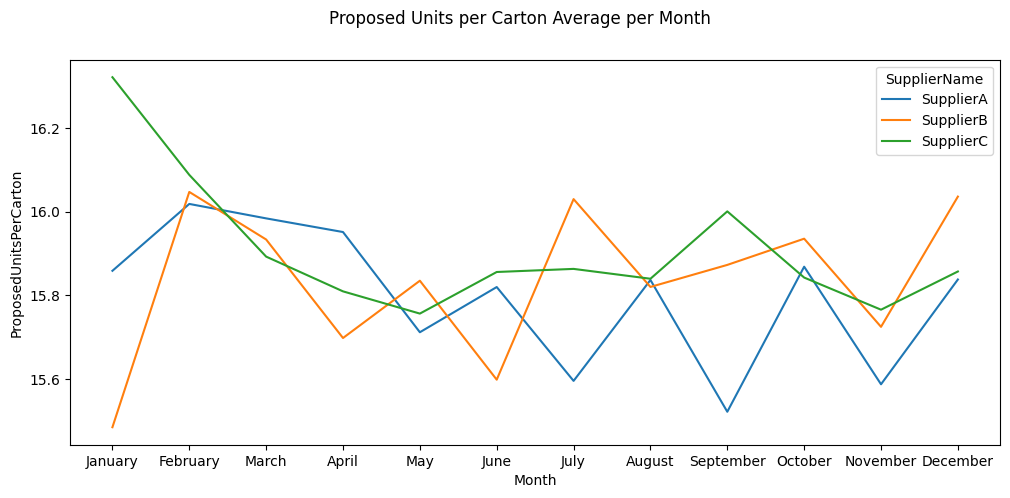

In [ ]:
fig,ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=density.groupby(['SupplierName','Month'],as_index=False).mean(numeric_only=True),x='Month',y='ProposedUnitsPerCarton',hue='SupplierName',ax=ax)
fig.suptitle("Proposed Units per Carton Average per Month")
plt.show()

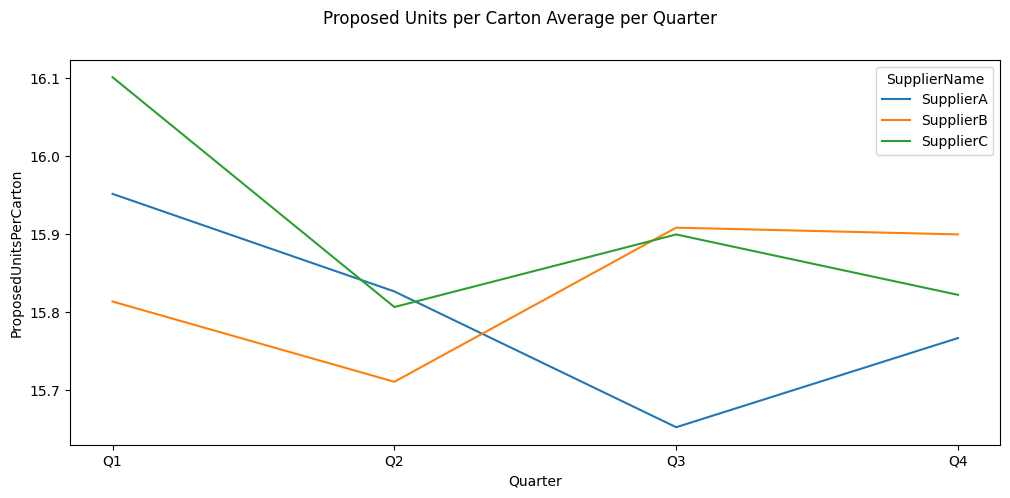

In [ ]:
fig,ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=density.groupby(['SupplierName','Quarter'],as_index=False).mean(numeric_only=True),x='Quarter',y='ProposedUnitsPerCarton',hue='SupplierName',ax=ax)
ax.set_xticks([1,2,3,4])
ax.xaxis.set_ticklabels(['Q1','Q2','Q3','Q4'])
fig.suptitle("Proposed Units per Carton Average per Quarter")
plt.show()

In [ ]:
density[density['SupplierName'] == 'SupplierA']

np.float64(15.82895901446867)

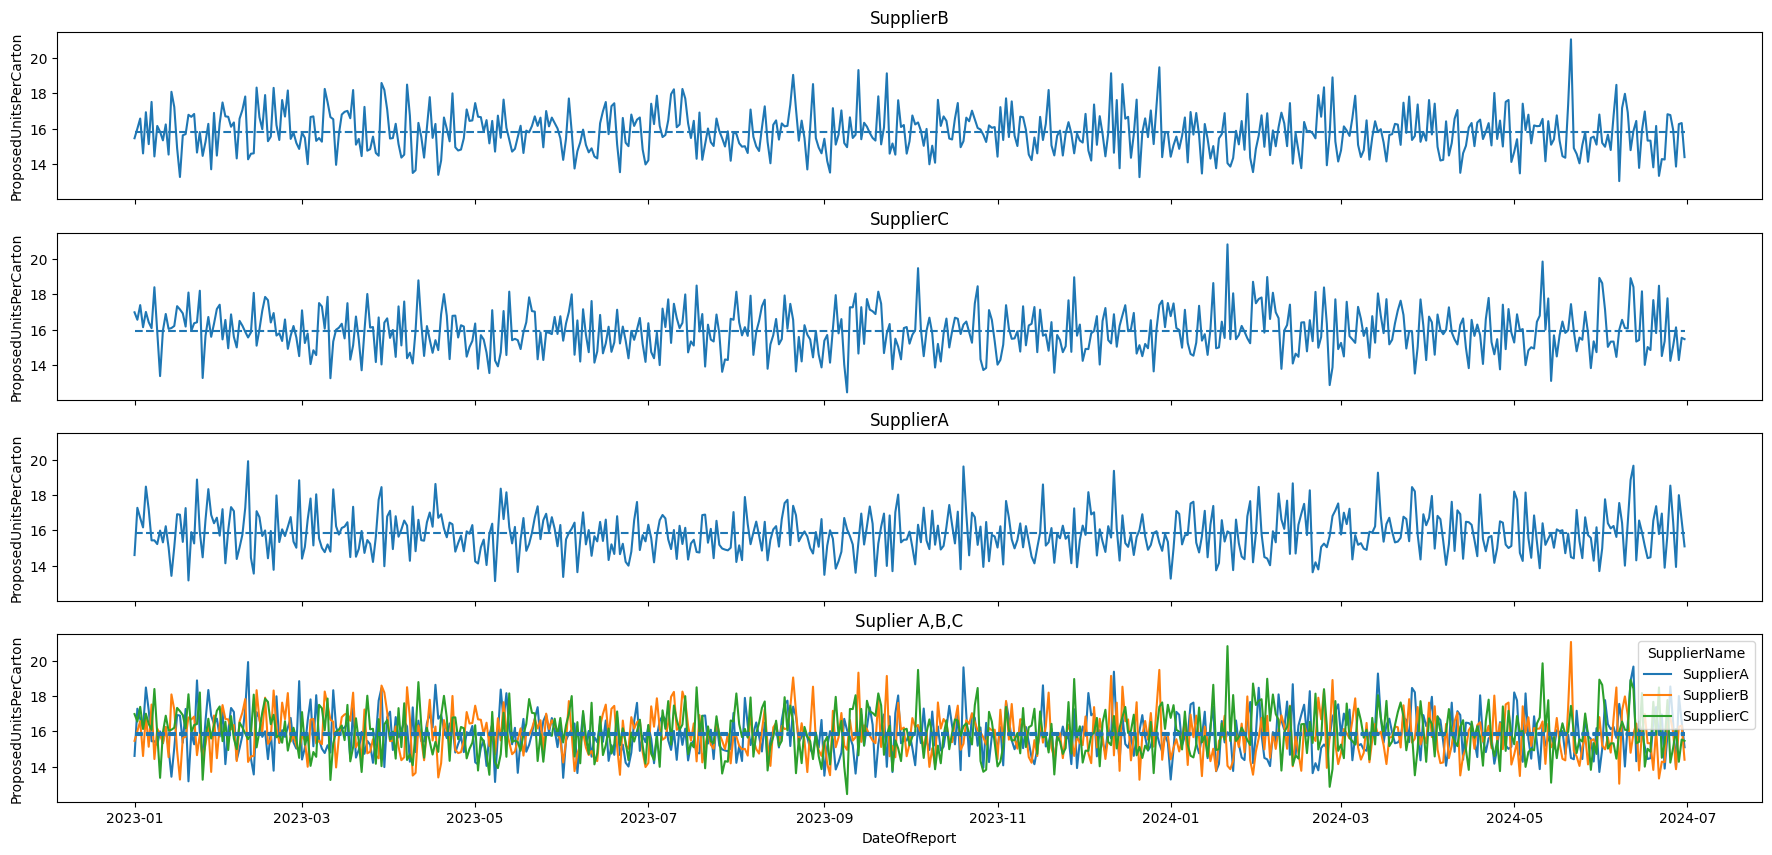

In [ ]:
fig,ax = plt.subplots(4,figsize=(22,10),sharex=True,sharey=True)
sns.lineplot(data=density.groupby(['SupplierName','DateOfReport'],as_index=False).mean(numeric_only=True),x='DateOfReport',y='ProposedUnitsPerCarton',hue='SupplierName',ax=ax[3])
ax[3].set_title("Suplier A,B,C")
for i,supplier in enumerate(density['SupplierName'].unique()):
  sns.lineplot(data=density[density['SupplierName'] == supplier].groupby(['DateOfReport'],as_index=False).mean(numeric_only=True),x='DateOfReport',y='ProposedUnitsPerCarton',ax=ax[i])
  ax[i].set_title(supplier)
  ax[i].hlines(np.float32(density[density['SupplierName'] == supplier]['ProposedUnitsPerCarton'].mean()),density['DateOfReport'].min(),density['DateOfReport'].max(),linestyles='dashed',label=f'{supplier} Average')
  ax[3].hlines(np.float32(density[density['SupplierName'] == supplier]['ProposedUnitsPerCarton'].mean()),density['DateOfReport'].min(),density['DateOfReport'].max(),linestyles='dashed',label=f'{supplier} Average')


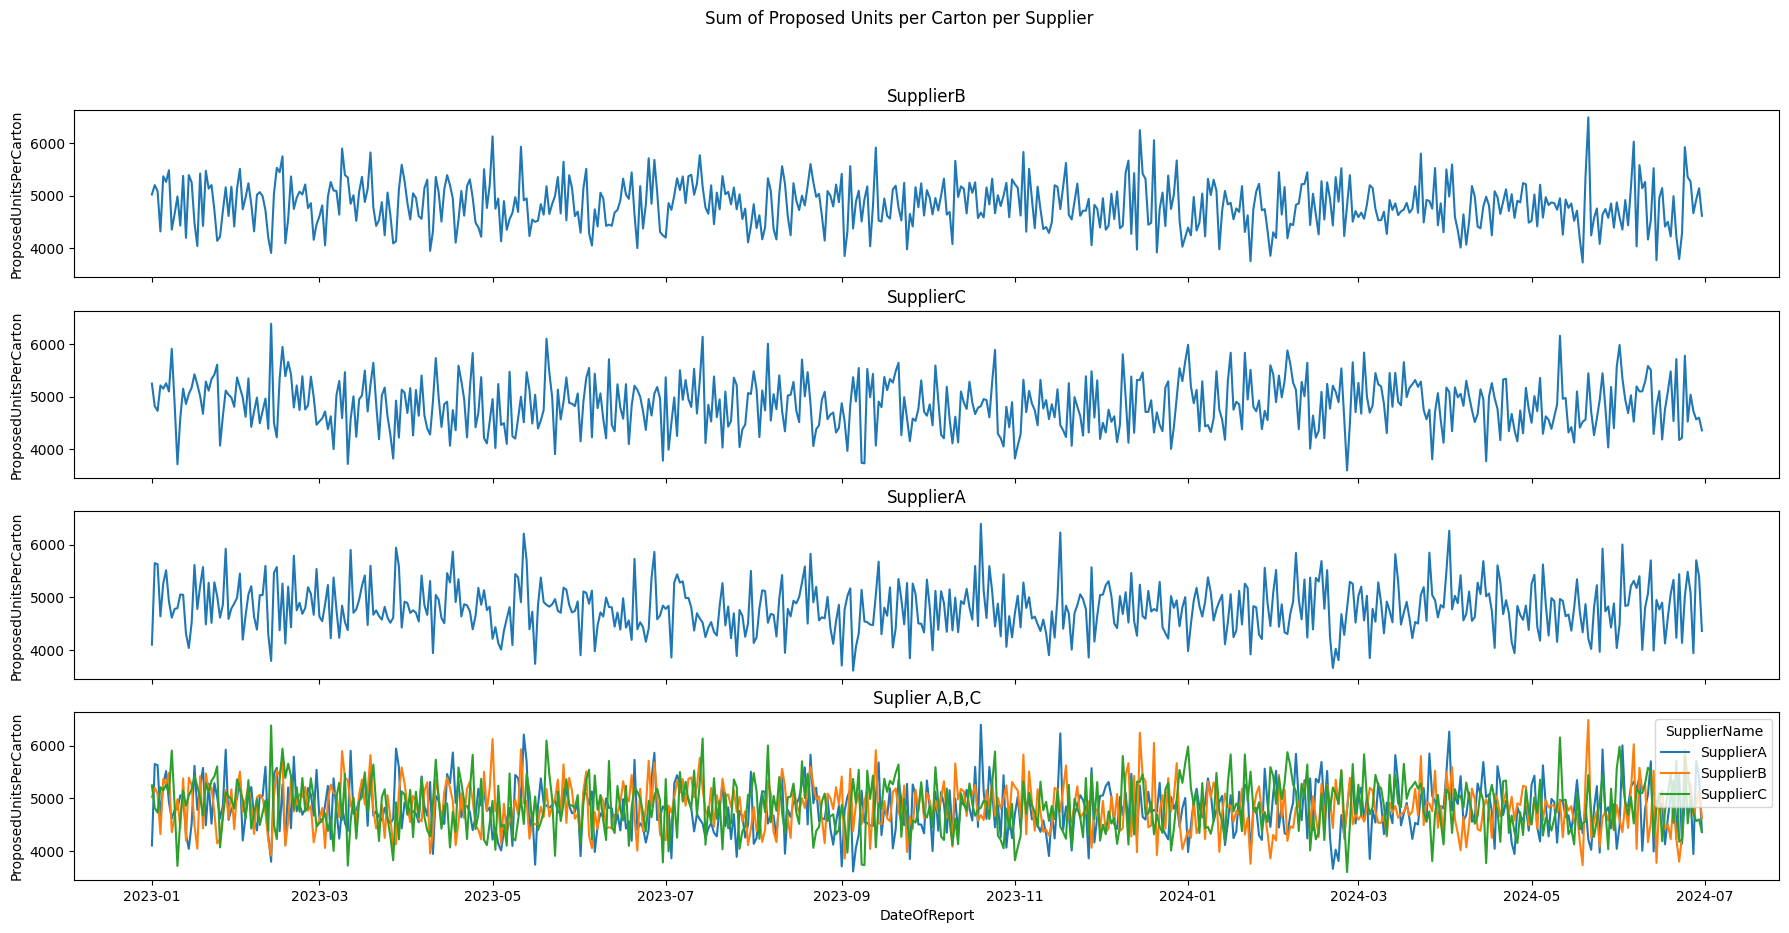

In [ ]:
fig,ax = plt.subplots(4,figsize=(22,10),sharex=True,sharey=True)
sns.lineplot(data=density.groupby(['SupplierName','DateOfReport'],as_index=False).sum(numeric_only=True),x='DateOfReport',y='ProposedUnitsPerCarton',hue='SupplierName',ax=ax[3])
ax[3].set_title("Suplier A,B,C")
for i,supplier in enumerate(density['SupplierName'].unique()):
  sns.lineplot(data=density[density['SupplierName'] == supplier].groupby(['DateOfReport'],as_index=False).sum(numeric_only=True),x='DateOfReport',y='ProposedUnitsPerCarton',ax=ax[i])
  ax[i].set_title(supplier)


fig.suptitle("Sum of Proposed Units per Carton per Supplier")
plt.show()

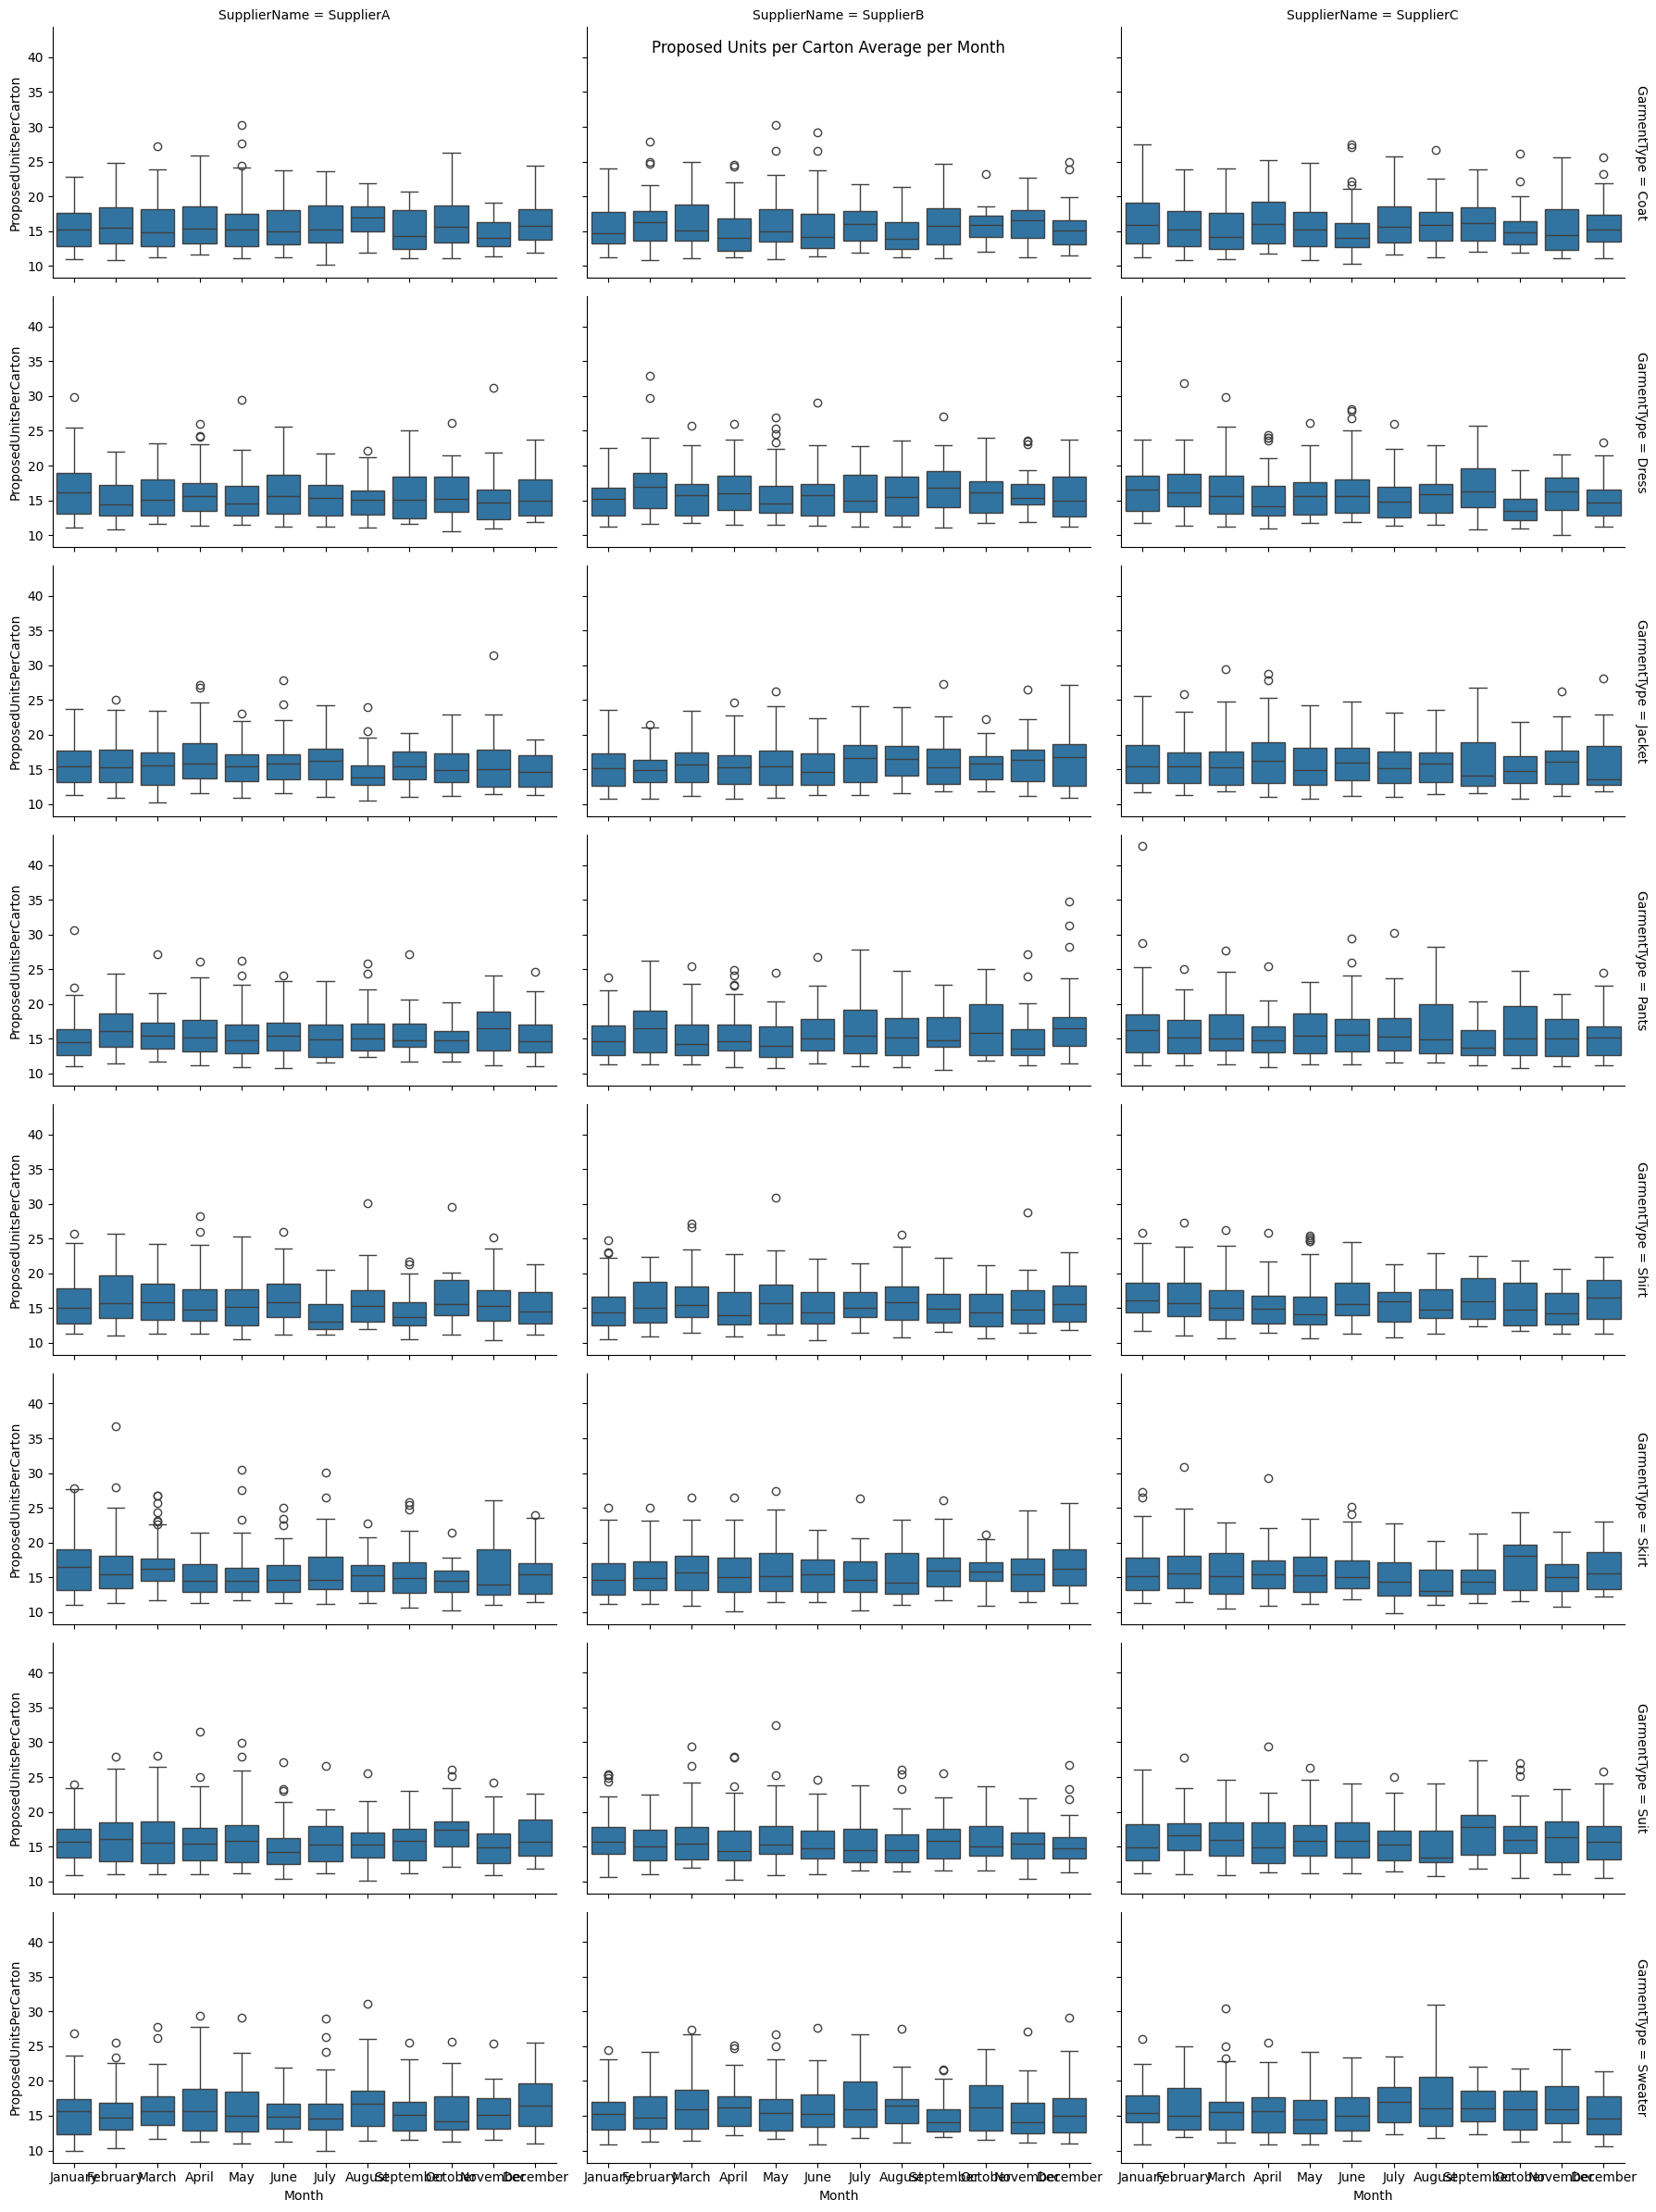

In [ ]:
temp = density.groupby(['SupplierName','GarmentType','Month','DateOfReport'],as_index=False).mean(numeric_only=True)
g = sns.FacetGrid(temp,row='GarmentType',col='SupplierName',margin_titles=True,sharex=True,sharey=True,aspect=2)
g.map_dataframe(sns.boxplot,y='ProposedUnitsPerCarton',x='Month')

plt.tight_layout()
g.fig.suptitle("Proposed Units per Carton Average per Month")
plt.show()

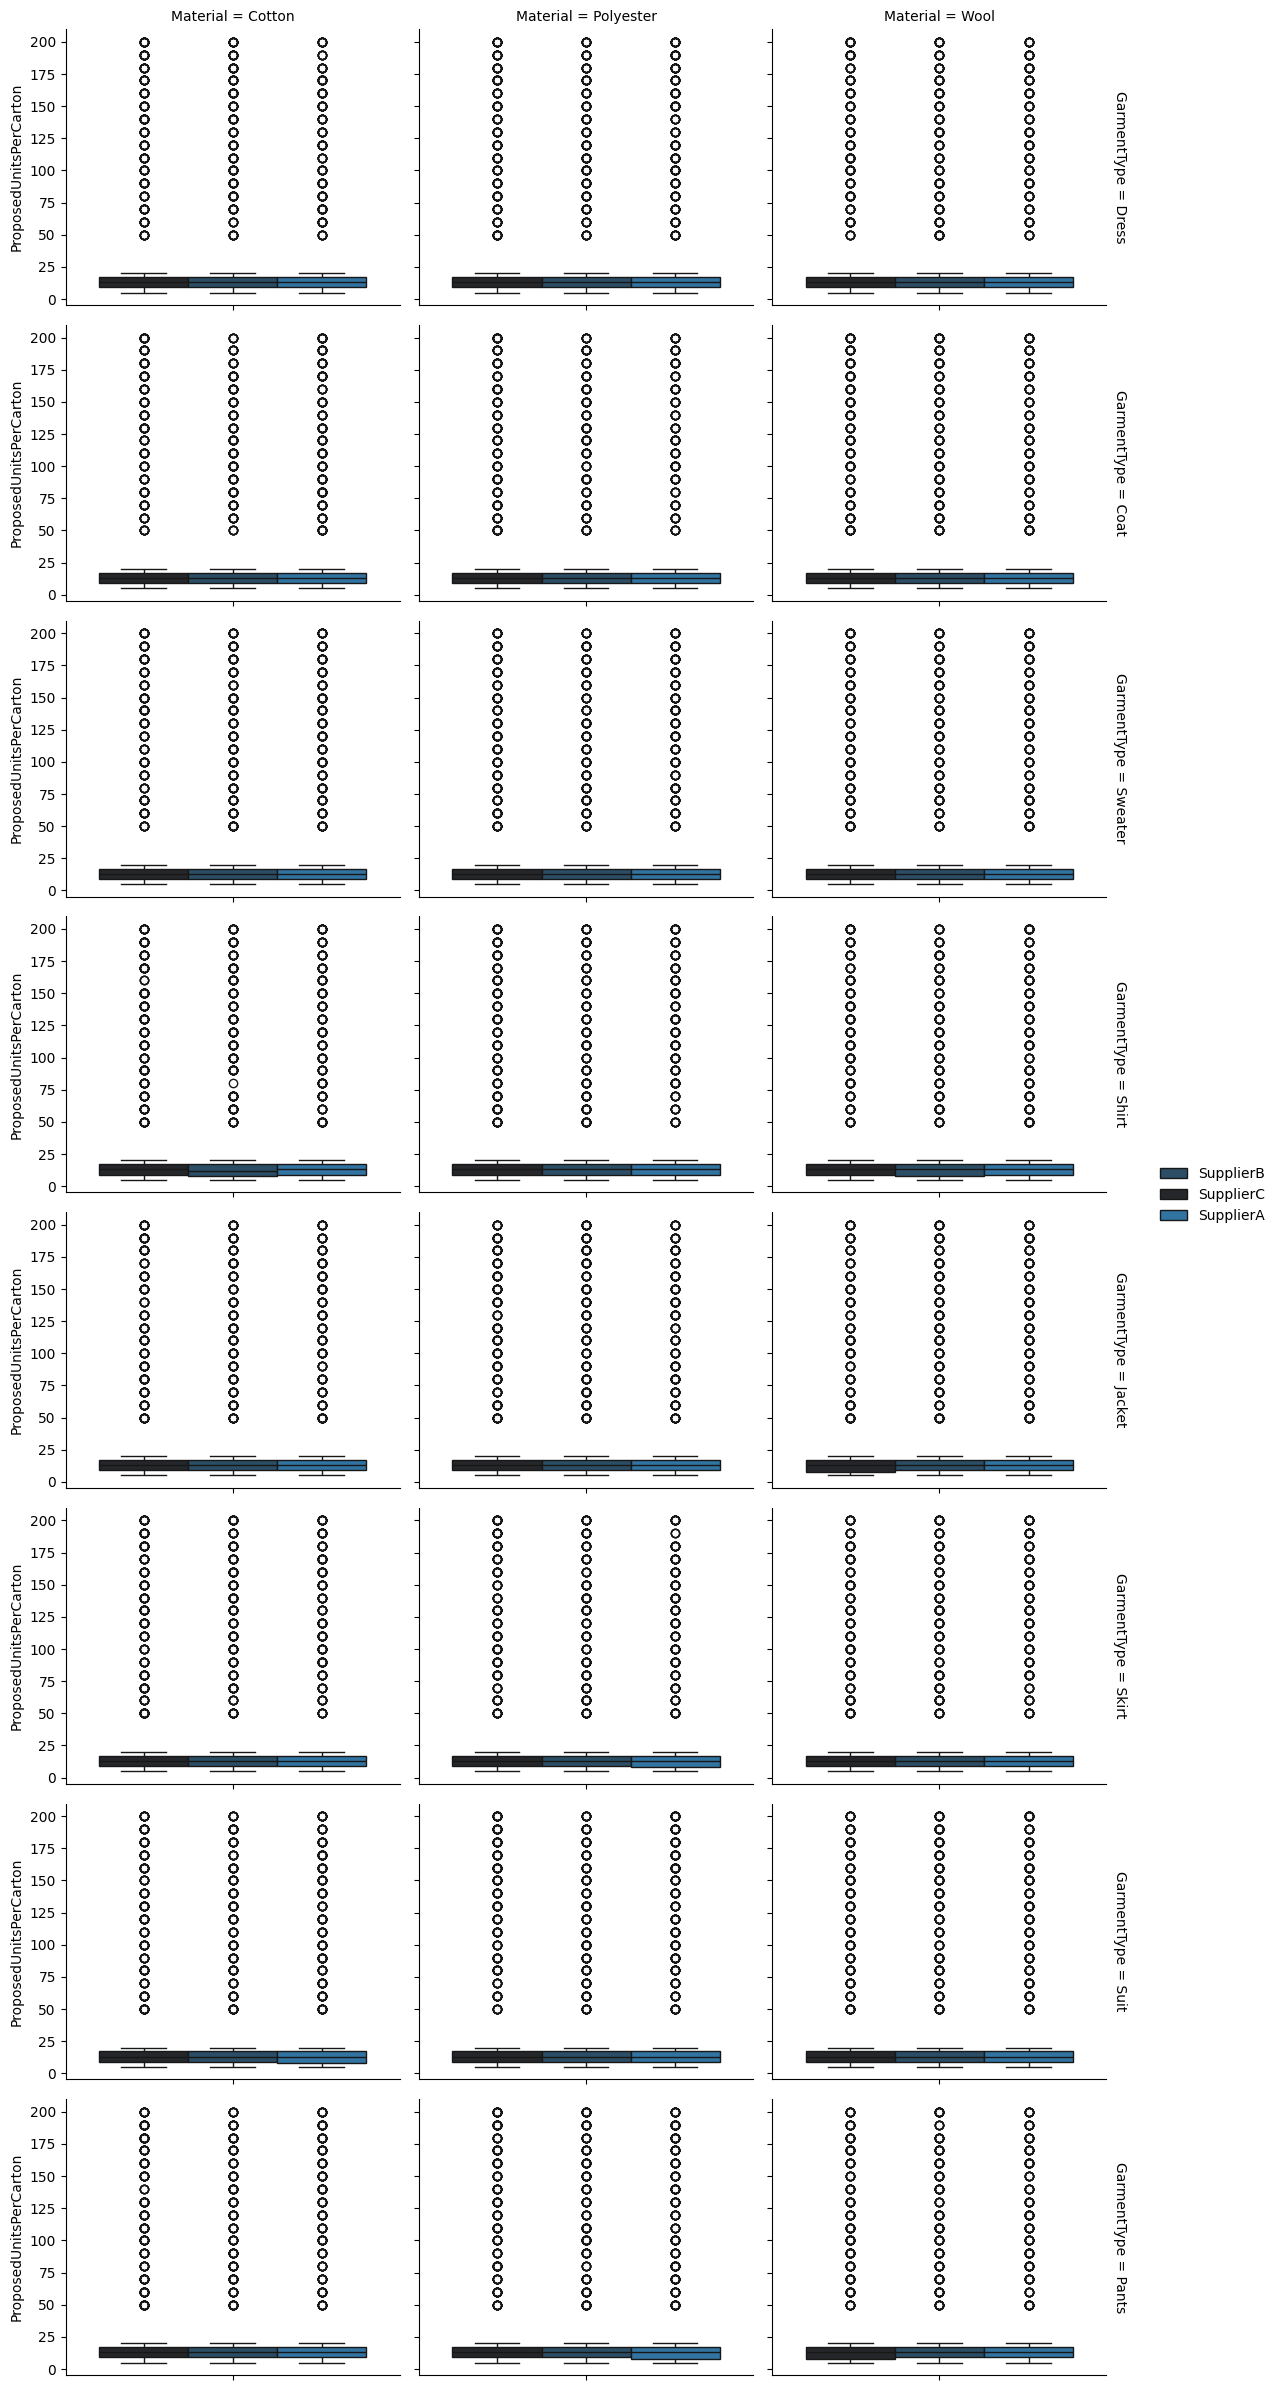

In [ ]:
g = sns.FacetGrid(density.drop(['DateOfReport','ProductReference'],axis=1),row='GarmentType',col='Material',margin_titles=True,sharex=True,sharey=True,aspect=1.3)
g.map_dataframe(sns.boxplot,y='ProposedUnitsPerCarton',hue='SupplierName')
g.add_legend()
plt.show()

#### Scorecard Adherence

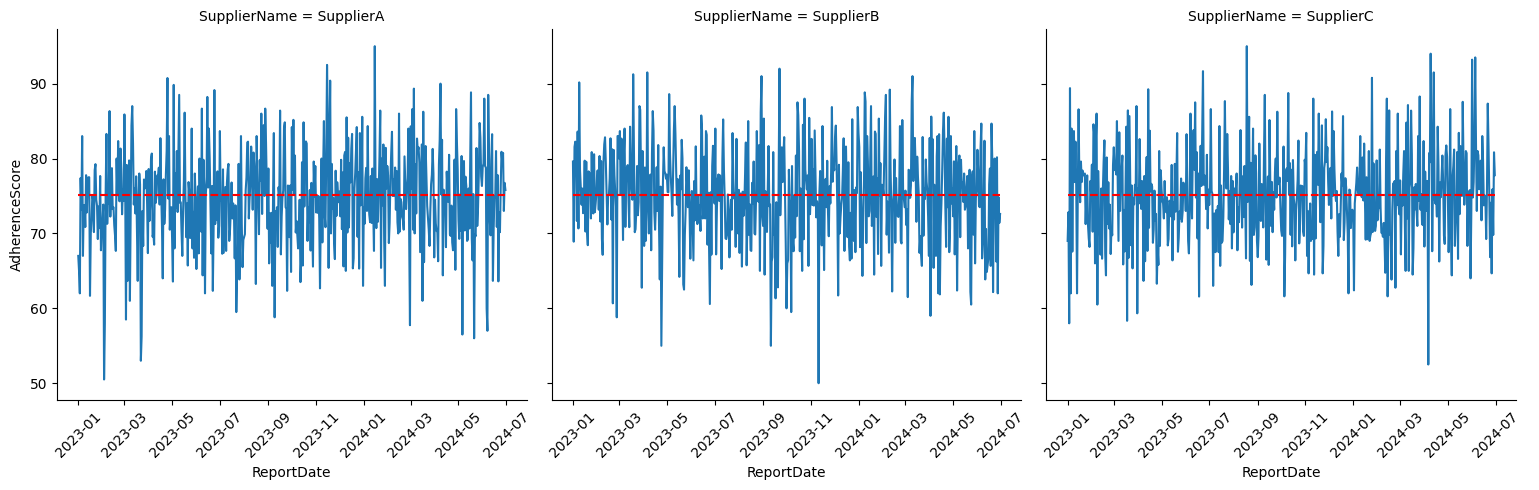

In [ ]:
g = sns.FacetGrid(scorecard.groupby(['ReportDate','SupplierName'],as_index=False).mean(numeric_only=True),col='SupplierName',height=5,aspect=1.02)
g.map_dataframe(sns.lineplot,x='ReportDate',y='AdherenceScore')
g.add_legend()
for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
    axes.hlines(np.float32(scorecard['AdherenceScore'].mean()),scorecard['ReportDate'].min(),scorecard['ReportDate'].max(),linestyles='--',color='red',label='Average')

plt.tight_layout()

SupplierName ReportDate  AdherenceScore  NumberOfReminders  \
0       SupplierB 2024-05-30              70                  0   
1       SupplierB 2023-04-23              54                  5   
2       SupplierC 2023-02-01              99                  1   
3       SupplierC 2024-05-05              69                  5   
4       SupplierB 2023-10-03              68                  0   
...           ...        ...             ...                ...   
9995    SupplierA 2023-12-19              66                  4   
9996    SupplierC 2023-11-13              69                  1   
9997    SupplierC 2024-02-05              94                  2   
9998    SupplierC 2024-01-01              62                  2   
9999    SupplierB 2023-03-23              63                  1   

     OnTimeDelivery  CostSavings        DoW     Month  Year  Quarter  
0               Yes      3349.32   Thursday       May  2024        2  
1               Yes      4006.58     Sunday     April  2023        2  
2               Yes       737.58  Wednesday  February  2023        1  
3                No      3211.89     Sunday       May  2024        2  
4               Yes      2302.41    Tuesday   October  2023        4  
...             ...          ...        ...       ...   ...      ...  
9995            Yes      2228.00    Tuesday  December  2023        4  
9996             No      1352.62     Monday  November  2023        4  
9997            Yes       940.95     Monday  February  2024        1  
9998            Yes      4175.55     Monday   January  2024        1  
9999            Yes      4468.21   Thursday     March  2023        1  

[10000 rows x 10 columns]

Index(['Wednesday', 'Thursday', 'Tuesday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Thursday', 'Tuesday', 'Friday',
       ...
       'Wednesday', 'Saturday', 'Tuesday', 'Monday', 'Saturday', 'Sunday',
       'Saturday', 'Sunday', 'Monday', 'Monday'],
      dtype='object', name='DateOfReport', length=500000)

In [ ]:
pd.to_datetime(density['DateOfReport']

0        2023-09-27
1        2024-05-30
2        2023-07-25
3        2023-06-16
4        2024-06-07
            ...    
499995   2024-06-30
499996   2024-04-13
499997   2024-01-21
499998   2023-09-18
499999   2023-02-20
Name: DateOfReport, Length: 500000, dtype: datetime64[ns]

In [ ]:
for col in density.select_dtypes('object').columns:
  print(density[col].unique())
  print()

['SuplierB' 'SupplierB' 'SupplierC' 'SupplierA' 'SuplierA' 'SuplierC']

['Dress' 'Coat' 'Sweater' 'Shirt' 'Jacket' 'Skirt' 'Suit' 'Pants']

['Cotton' 'Polyester' 'Wool']

['DRE-COT-1992' 'COA-POL-8528' 'SWE-WOO-2045' ... 'SHI-POL-4220'
 'PAN-POL-3524' 'SWE-COT-2243']

['Method1' 'Method2' 'Method3' 'Unknown']

['LayoutA' 'LayoutB' 'LayoutD' 'LayoutE' 'LayoutC' nan]

['Good' 'Bad']



2.1.4 Univariate Analysis

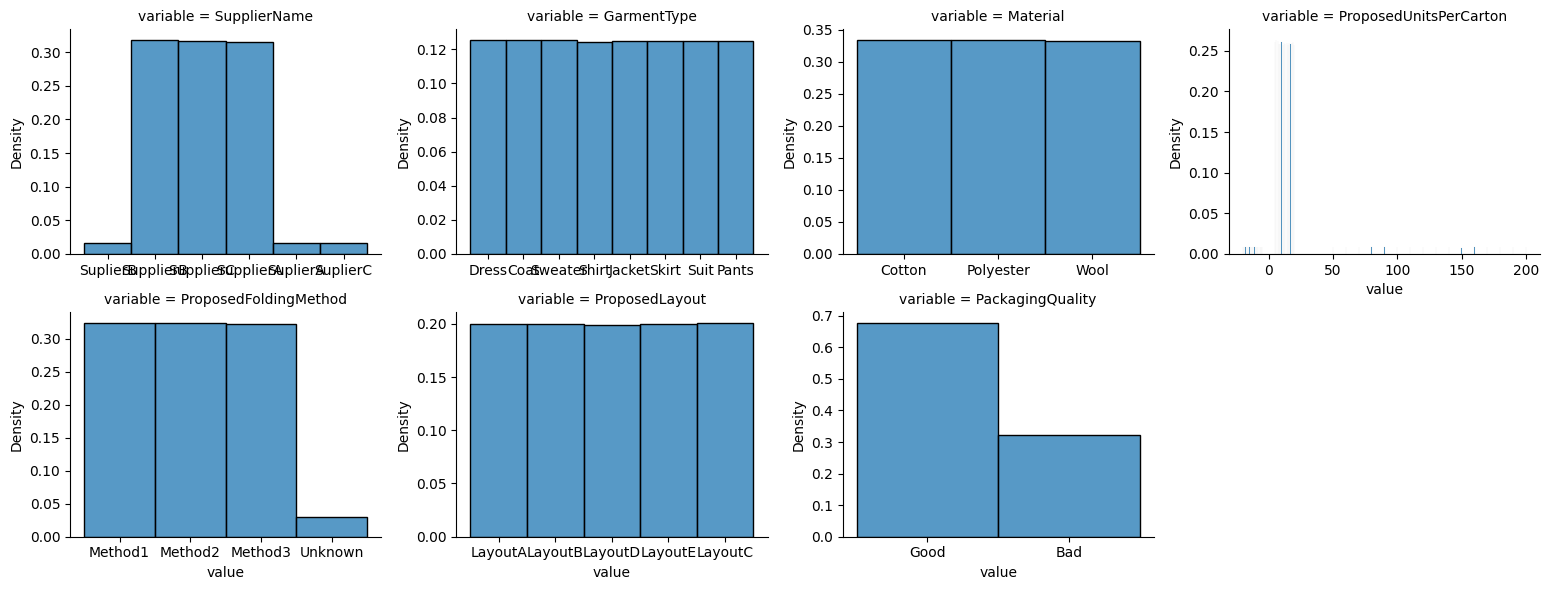

In [ ]:
g = sns.FacetGrid(density.drop(['DateOfReport','ProductReference','DataLabeled'],axis=1).melt(),col='variable',margin_titles=True,col_wrap=4,sharex=False,sharey=False,aspect=1.3)
g.map_dataframe(sns.histplot,x='value',stat='density')

- We see tha name that is equaly distributed among most of the features
- Density for the proposing method there is some `Unknown` fold that is being used it represents < 0.05
- `ProposedUnitsPerCarton` it varies a lot, there seem to be a prefered fold among garmets
- `PackagingQuality` there are more `Good` than `Bad` items

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductReference  5000 non-null   object 
 1   GarmentType       5000 non-null   object 
 2   Material          5000 non-null   object 
 3   ProductName       5000 non-null   object 
 4   Size              5000 non-null   object 
 5   Collection        5000 non-null   object 
 6   Weight            5000 non-null   float64
dtypes: float64(1), object(6)
memory usage: 273.6+ KB


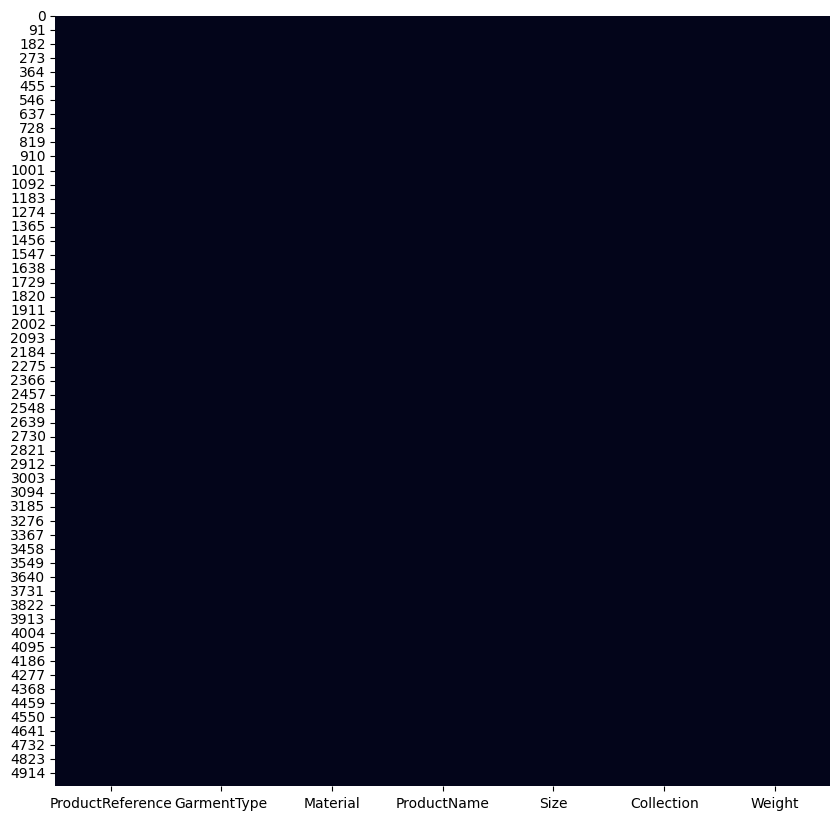

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(attributes.isna(),cbar=False,ax=ax)
attributes.info(verbose=True,show_counts=True)

In [ ]:
for col in attributes.select_dtypes('object').columns:
  print(attributes[col].value_counts(dropna=False))
  print()

ProductReference
JAC-WOO-2341    1
DRE-POL-3051    1
SWE-COT-8247    1
SKI-WOO-2650    1
SUI-POL-3201    1
               ..
SKI-COT-2111    1
SKI-COT-1335    1
DRE-COT-3753    1
COA-COT-2277    1
DRE-POL-7435    1
Name: count, Length: 5000, dtype: int64

GarmentType
Skirt      653
Jacket     648
Suit       633
Dress      626
Pants      622
Shirt      613
Coat       612
Sweater    593
Name: count, dtype: int64

Material
Polyester    1670
Wool         1667
Cotton       1663
Name: count, dtype: int64

ProductName
Jacket Wool 2341        1
Dress Polyester 3051    1
Sweater Cotton 8247     1
Skirt Wool 2650         1
Suit Polyester 3201     1
                       ..
Skirt Cotton 2111       1
Skirt Cotton 1335       1
Dress Cotton 3753       1
Coat Cotton 2277        1
Dress Polyester 7435    1
Name: count, Length: 5000, dtype: int64

Size
S      1037
M      1026
XXL    1014
L       992
XL      931
Name: count, dtype: int64

Collection
Summer    2529
Winter    2471
Name: count, dtype: int

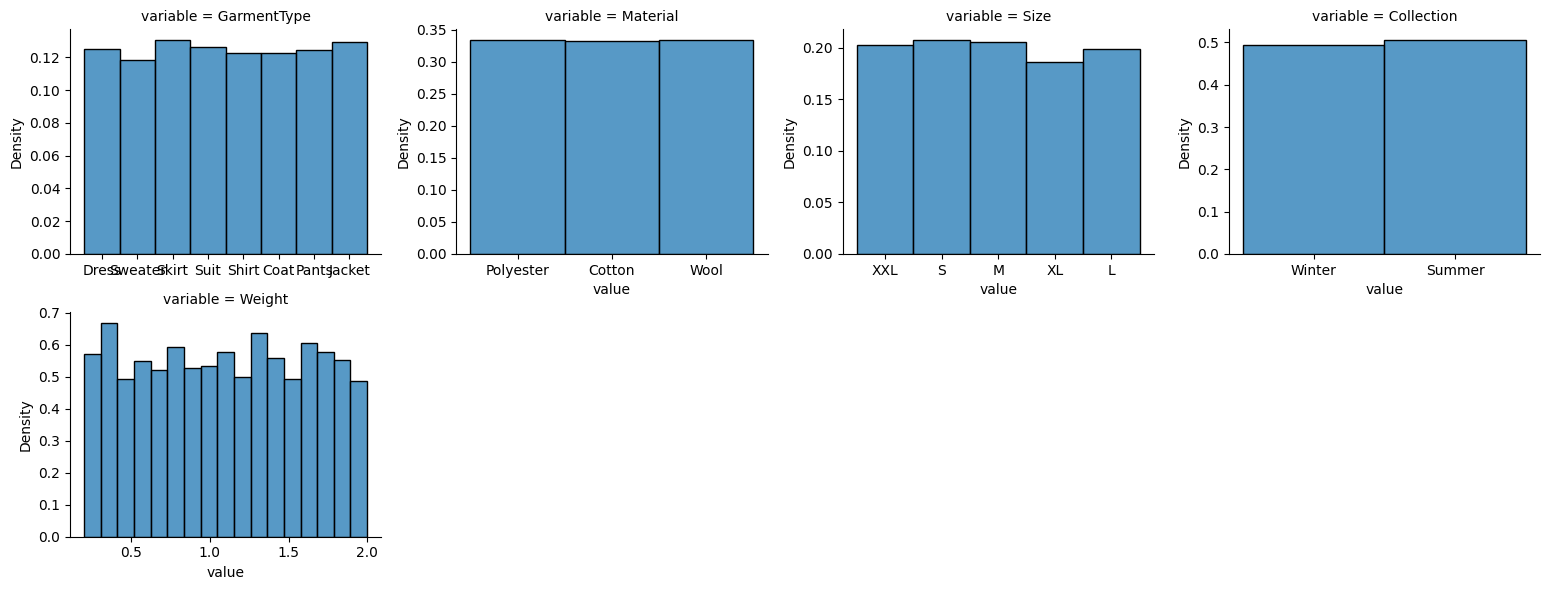

In [ ]:
g = sns.FacetGrid(attributes.drop(['ProductReference','ProductName'],axis=1).melt(),col='variable',margin_titles=True,col_wrap=4,sharex=False,sharey=False,aspect=1.3)
g.map_dataframe(sns.histplot,x='value',stat='density')

In [ ]:
main = pd.merge(density,attributes.dropna(),on="ProductReference",how="left").dropna()

In [ ]:
main

SupplierName DateOfReport GarmentType_x Material_x ProductReference  \
31        SupplierA   2023-05-08        Jacket  Polyester     JAC-POL-8398   
131       SupplierC   2024-02-26          Suit  Polyester     SUI-POL-7007   
198       SupplierB   2024-05-27         Dress     Cotton     DRE-COT-6328   
352        SuplierC   2023-04-15       Sweater  Polyester     SWE-POL-9034   
371       SupplierB   2023-10-28         Skirt  Polyester     SKI-POL-7338   
...             ...          ...           ...        ...              ...   
499719    SupplierA   2024-02-17       Sweater  Polyester     SWE-POL-1564   
499787    SupplierC   2023-11-20         Skirt  Polyester     SKI-POL-3791   
499879    SupplierC   2023-11-07       Sweater     Cotton     SWE-COT-9125   
499902    SupplierB   2023-07-11         Pants       Wool     PAN-WOO-5146   
499932    SupplierC   2023-01-05          Coat  Polyester     COA-POL-7543   

        ProposedUnitsPerCarton ProposedFoldingMethod ProposedLayout  \
31                           9               Method1        LayoutB   
131                         14               Method2        LayoutD   
198                          5               Method2        LayoutB   
352                         11               Method1        LayoutB   
371                         12               Method2        LayoutE   
...                        ...                   ...            ...   
499719                       9               Method2        LayoutC   
499787                      10               Method1        LayoutB   
499879                      17               Method3        LayoutA   
499902                      17               Method1        LayoutE   
499932                       9               Method2        LayoutB   

       PackagingQuality  DataLabeled GarmentType_y Material_y  \
31                 Good         True        Jacket  Polyester   
131                Good         True          Suit  Polyester   
198                Good         True         Dress     Cotton   
352                Good         True       Sweater  Polyester   
371                Good         True         Skirt  Polyester   
...                 ...          ...           ...        ...   
499719             Good         True       Sweater  Polyester   
499787             Good         True         Skirt  Polyester   
499879             Good         True       Sweater     Cotton   
499902             Good         True         Pants       Wool   
499932             Good         True          Coat  Polyester   

                   ProductName Size Collection  Weight  
31       Jacket Polyester 8398    L     Summer    0.81  
131        Suit Polyester 7007   XL     Winter    1.65  
198          Dress Cotton 6328  XXL     Summer    1.89  
352     Sweater Polyester 9034    L     Summer    1.87  
371       Skirt Polyester 7338    L     Winter    1.96  
...                        ...  ...        ...     ...  
499719  Sweater Polyester 1564   XL     Summer    1.12  
499787    Skirt Polyester 3791    M     Winter    1.42  
499879     Sweater Cotton 9125   XL     Summer    1.21  
499902         Pants Wool 5146    S     Summer    0.54  
499932     Coat Polyester 7543  XXL     Winter    0.75  

[11208 rows x 16 columns]

In [ ]:
def get_reference_product_type_and_name(product_reference:str) -> str:


In [ ]:
len(attributes_set-density_set)

478

In [ ]:
len(density_set-attributes_set)

189357

In [ ]:
attributes.head()

ProductReference GarmentType   Material           ProductName Size  \
0     DRE-POL-3051       Dress  Polyester  Dress Polyester 3051  XXL   
1     SWE-COT-8247     Sweater     Cotton   Sweater Cotton 8247    S   
2     SKI-WOO-2650       Skirt       Wool       Skirt Wool 2650    M   
3     SUI-POL-3201        Suit  Polyester   Suit Polyester 3201   XL   
4     SUI-WOO-4038        Suit       Wool        Suit Wool 4038  XXL   

  Collection  Weight  
0     Winter    0.59  
1     Summer    0.31  
2     Winter    1.52  
3     Winter    1.38  
4     Summer    1.10

In [ ]:
main = pd.merge(density,attributes.dropna(),on="ProductReference",how="left",)
main

SupplierName DateOfReport GarmentType_x Material_x ProductReference  \
0          SuplierB   2023-09-27         Dress     Cotton     DRE-COT-1992   
1         SupplierB   2024-05-30          Coat  Polyester     COA-POL-8528   
2         SupplierC   2023-07-25       Sweater       Wool     SWE-WOO-2045   
3         SupplierC   2023-06-16         Dress  Polyester     DRE-POL-3008   
4         SupplierA   2024-06-07         Shirt  Polyester     SHI-POL-5449   
...             ...          ...           ...        ...              ...   
499995    SupplierC   2024-06-30         Dress     Cotton              NaN   
499996    SupplierB   2024-04-13        Jacket       Wool     JAC-WOO-6107   
499997    SupplierC   2024-01-21         Pants       Wool     PAN-WOO-1779   
499998    SupplierC   2023-09-18       Sweater     Cotton     SWE-COT-2243   
499999    SupplierA   2023-02-20         Dress     Cotton     DRE-COT-2081   

        ProposedUnitsPerCarton ProposedFoldingMethod ProposedLayout  \
0                            7               Method1        LayoutA   
1                           12               Method2        LayoutB   
2                           14               Method1        LayoutD   
3                           17               Method1        LayoutE   
4                           20               Method2        LayoutB   
...                        ...                   ...            ...   
499995                      11               Method1        LayoutA   
499996                      12               Unknown        LayoutE   
499997                      19               Method2        LayoutD   
499998                     -13               Method1        LayoutB   
499999                     -15               Method2        LayoutD   

       PackagingQuality  DataLabeled GarmentType_y Material_y ProductName  \
0                  Good         True           NaN        NaN         NaN   
1                   Bad         True           NaN        NaN         NaN   
2                   Bad         True           NaN        NaN         NaN   
3                  Good         True           NaN        NaN         NaN   
4                  Good         True           NaN        NaN         NaN   
...                 ...          ...           ...        ...         ...   
499995             Good         True           NaN        NaN         NaN   
499996             Good         True           NaN        NaN         NaN   
499997             Good         True           NaN        NaN         NaN   
499998             Good         True           NaN        NaN         NaN   
499999             Good         True           NaN        NaN         NaN   

       Size Collection  Weight  
0       NaN        NaN     NaN  
1       NaN        NaN     NaN  
2       NaN        NaN     NaN  
3       NaN        NaN     NaN  
4       NaN        NaN     NaN  
...     ...        ...     ...  
499995  NaN        NaN     NaN  
499996  NaN        NaN     NaN  
499997  NaN        NaN     NaN  
499998  NaN        NaN     NaN  
499999  NaN        NaN     NaN  

[500000 rows x 16 columns]

<Axes: >

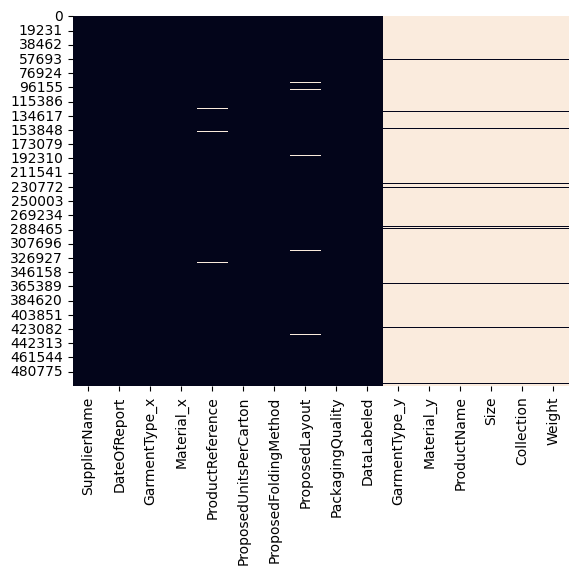

In [ ]:
sns.heatmap(main.isna(),cbar=False)

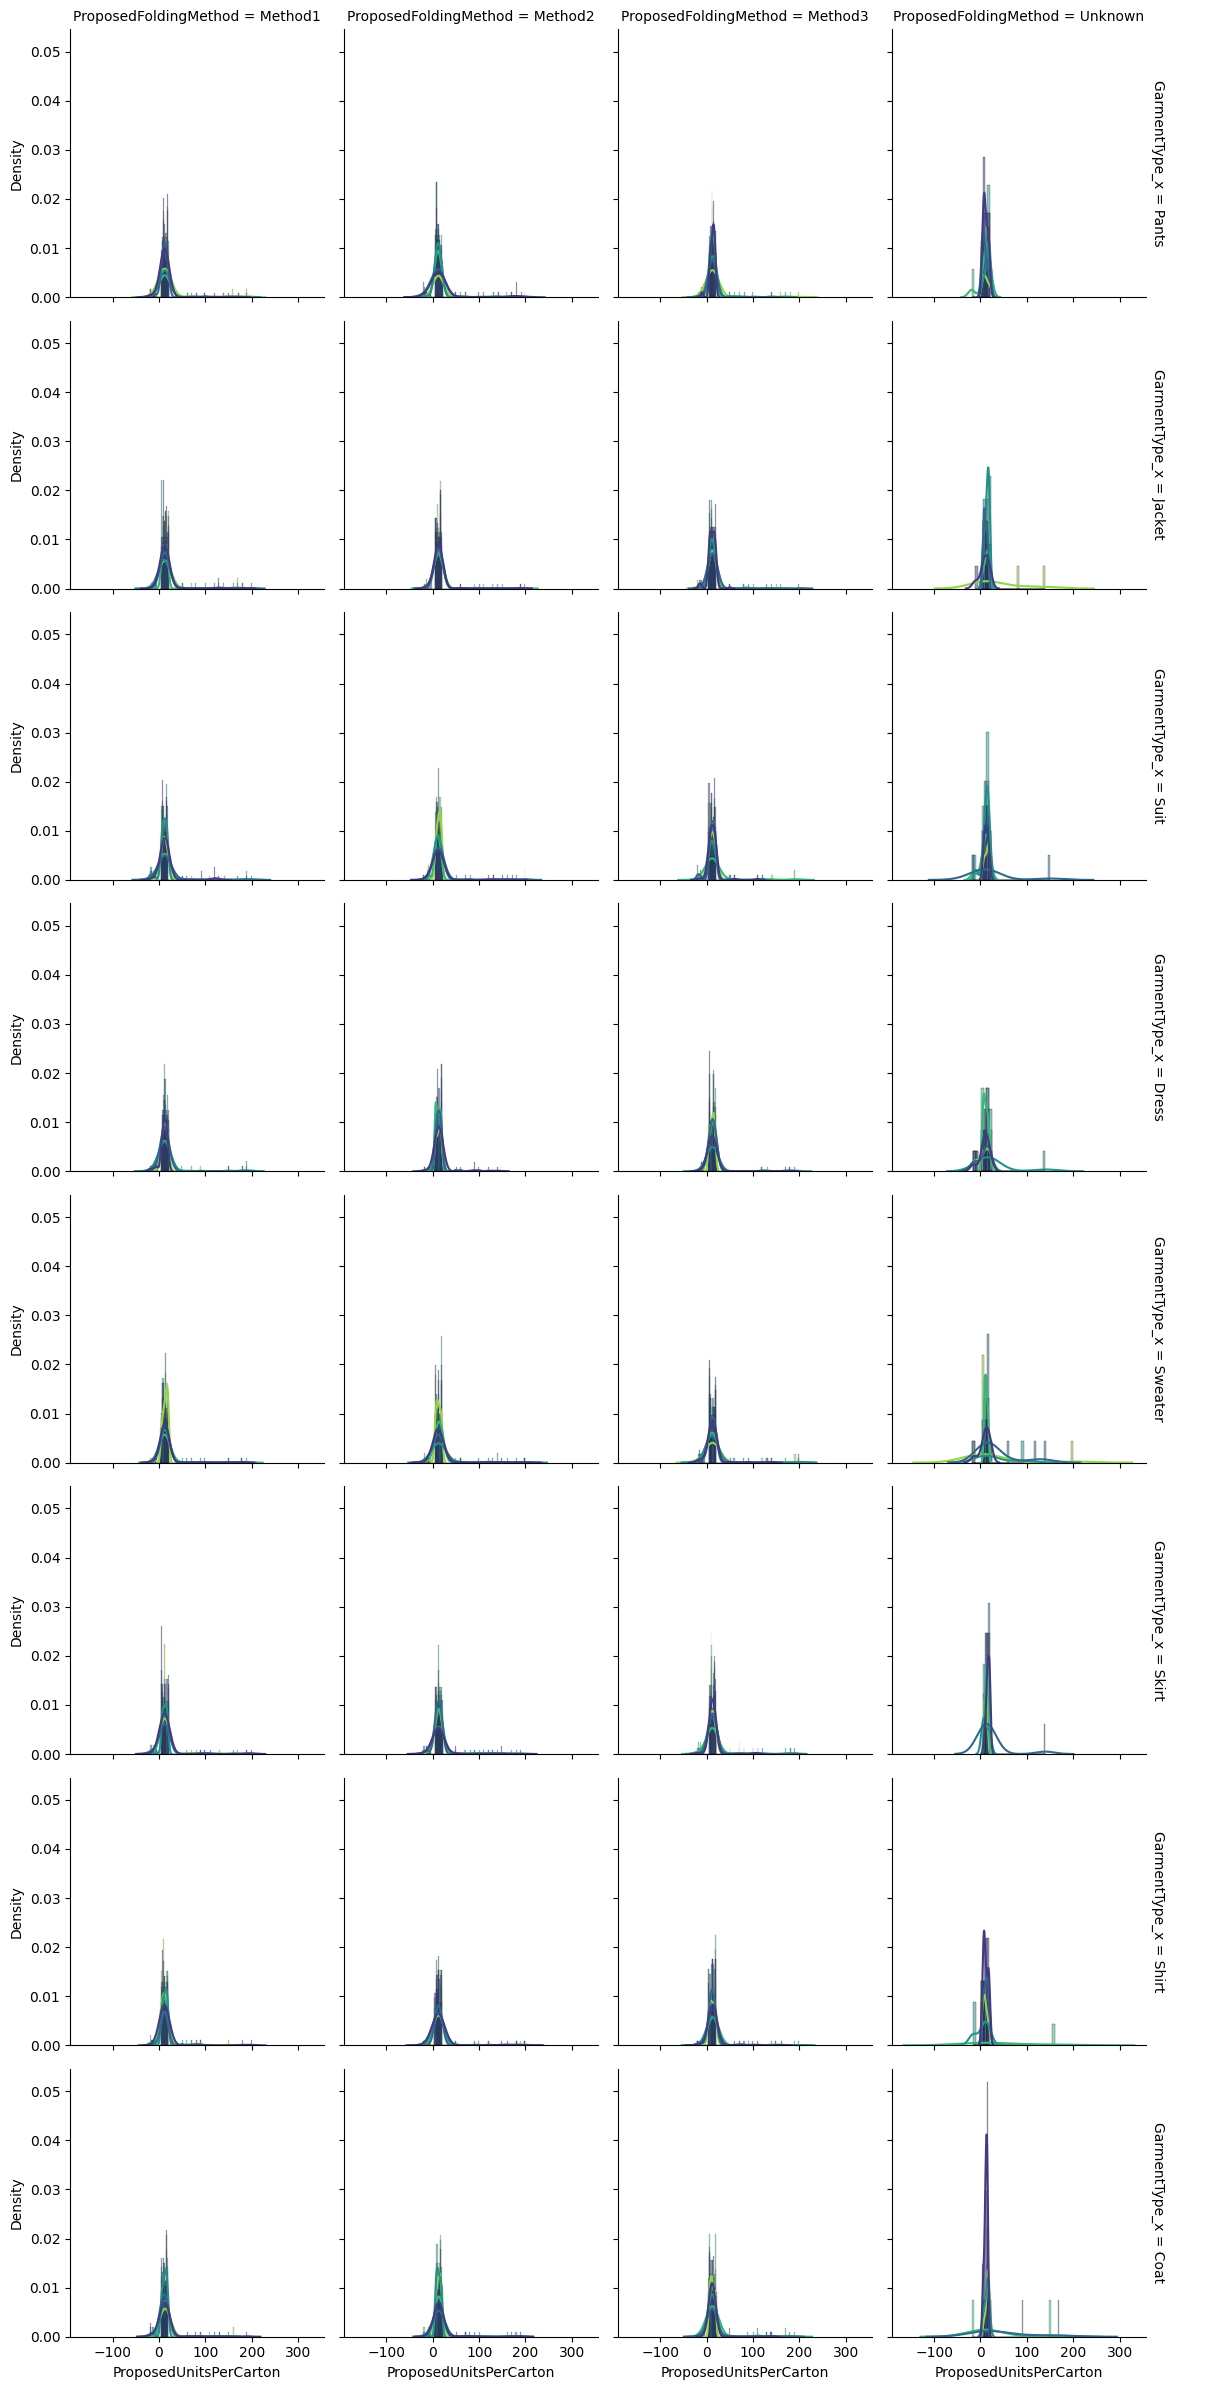

In [ ]:
hist_kwargs = {'stat':'density','palette':'viridis'}
kdeplot_kwargs={'palette':'viridis'}
g = sns.FacetGrid(density, col='ProposedFoldingMethod',row='GarmentType',margin_titles=True)
g.map_dataframe(sns.kdeplot,x='ProposedUnitsPerCarton',hue='Size',**kdeplot_kwargs)
g.map_dataframe(sns.histplot,x='ProposedUnitsPerCarton',hue='Size',**hist_kwargs)
g.add_legend()

### 2.2 Data Cleaning

In [ ]:
# Replace values: {'SuplierB':'SupplierB','SuplierC':'SupplierC','SuplierA':'SupplierA'}

#### 2.1.1 Findings:
- There are a few records with no data, we can use either kmeans or the mean to fill missing values

In [ ]:
attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductReference  5000 non-null   object 
 1   GarmentType       5000 non-null   object 
 2   Material          5000 non-null   object 
 3   ProductName       5000 non-null   object 
 4   Size              5000 non-null   object 
 5   Collection        5000 non-null   object 
 6   Weight            5000 non-null   float64
dtypes: float64(1), object(6)
memory usage: 273.6+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SupplierName            500000 non-null  object        
 1   DateOfReport            500000 non-null  datetime64[ns]
 2   GarmentType             500000 non-null  object        
 3   Material                500000 non-null  object        
 4   ProductReference        489923 non-null  object        
 5   ProposedUnitsPerCarton  500000 non-null  int64         
 6   ProposedFoldingMethod   500000 non-null  object        
 7   ProposedLayout          490047 non-null  object        
 8   PackagingQuality        500000 non-null  object        
 9   DataLabeled             500000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(7)
memory usage: 34.8+ MB


In [ ]:
main = pd.merge(df,attributes,on="ProductReference")

In [ ]:
main[main['ProductReference'] == 'PAN-WOO-1587']

SupplierName DateOfReport GarmentType_x Material_x ProductReference  \
0       SupplierA   2023-09-26         Pants       Wool     PAN-WOO-1587   
1071    SupplierC   2023-04-28         Pants       Wool     PAN-WOO-1587   
2717    SupplierB   2023-05-03         Pants       Wool     PAN-WOO-1587   
3043    SupplierB   2023-01-12         Pants       Wool     PAN-WOO-1587   
3956    SupplierC   2024-03-04         Pants       Wool     PAN-WOO-1587   
5563    SupplierA   2024-06-01         Pants       Wool     PAN-WOO-1587   
6452    SupplierC   2023-02-10         Pants       Wool     PAN-WOO-1587   

      ProposedUnitsPerCarton ProposedFoldingMethod ProposedLayout  \
0                          9               Method1            NaN   
1071                       5               Method2        LayoutE   
2717                       6               Method3        LayoutE   
3043                       8               Method1        LayoutD   
3956                      16               Method3        LayoutD   
5563                      16               Method3        LayoutD   
6452                       5               Method1        LayoutD   

     PackagingQuality  DataLabeled GarmentType_y Material_y      ProductName  \
0                 Bad         True         Pants       Wool  Pants Wool 1587   
1071              Bad         True         Pants       Wool  Pants Wool 1587   
2717             Good         True         Pants       Wool  Pants Wool 1587   
3043             Good         True         Pants       Wool  Pants Wool 1587   
3956             Good         True         Pants       Wool  Pants Wool 1587   
5563              Bad         True         Pants       Wool  Pants Wool 1587   
6452              Bad         True         Pants       Wool  Pants Wool 1587   

     Size Collection  Weight  
0     XXL     Summer    0.28  
1071  XXL     Summer    0.28  
2717  XXL     Summer    0.28  
3043  XXL     Summer    0.28  
3956  XXL     Summer    0.28  
5563  XXL     Summer    0.28  
6452  XXL     Summer    0.28

In [ ]:
main['SupplierName'].value_counts()

SupplierName
SupplierC    3671
SupplierB    3594
SupplierA    3572
SuplierC      212
SuplierB      190
SuplierA      188
Name: count, dtype: int64

In [ ]:
main['SupplierName'].replace({"SuplierC":"SupplierC","SuplierB":"SupplierB","SuplierA":"SupplierA"},inplace=True)

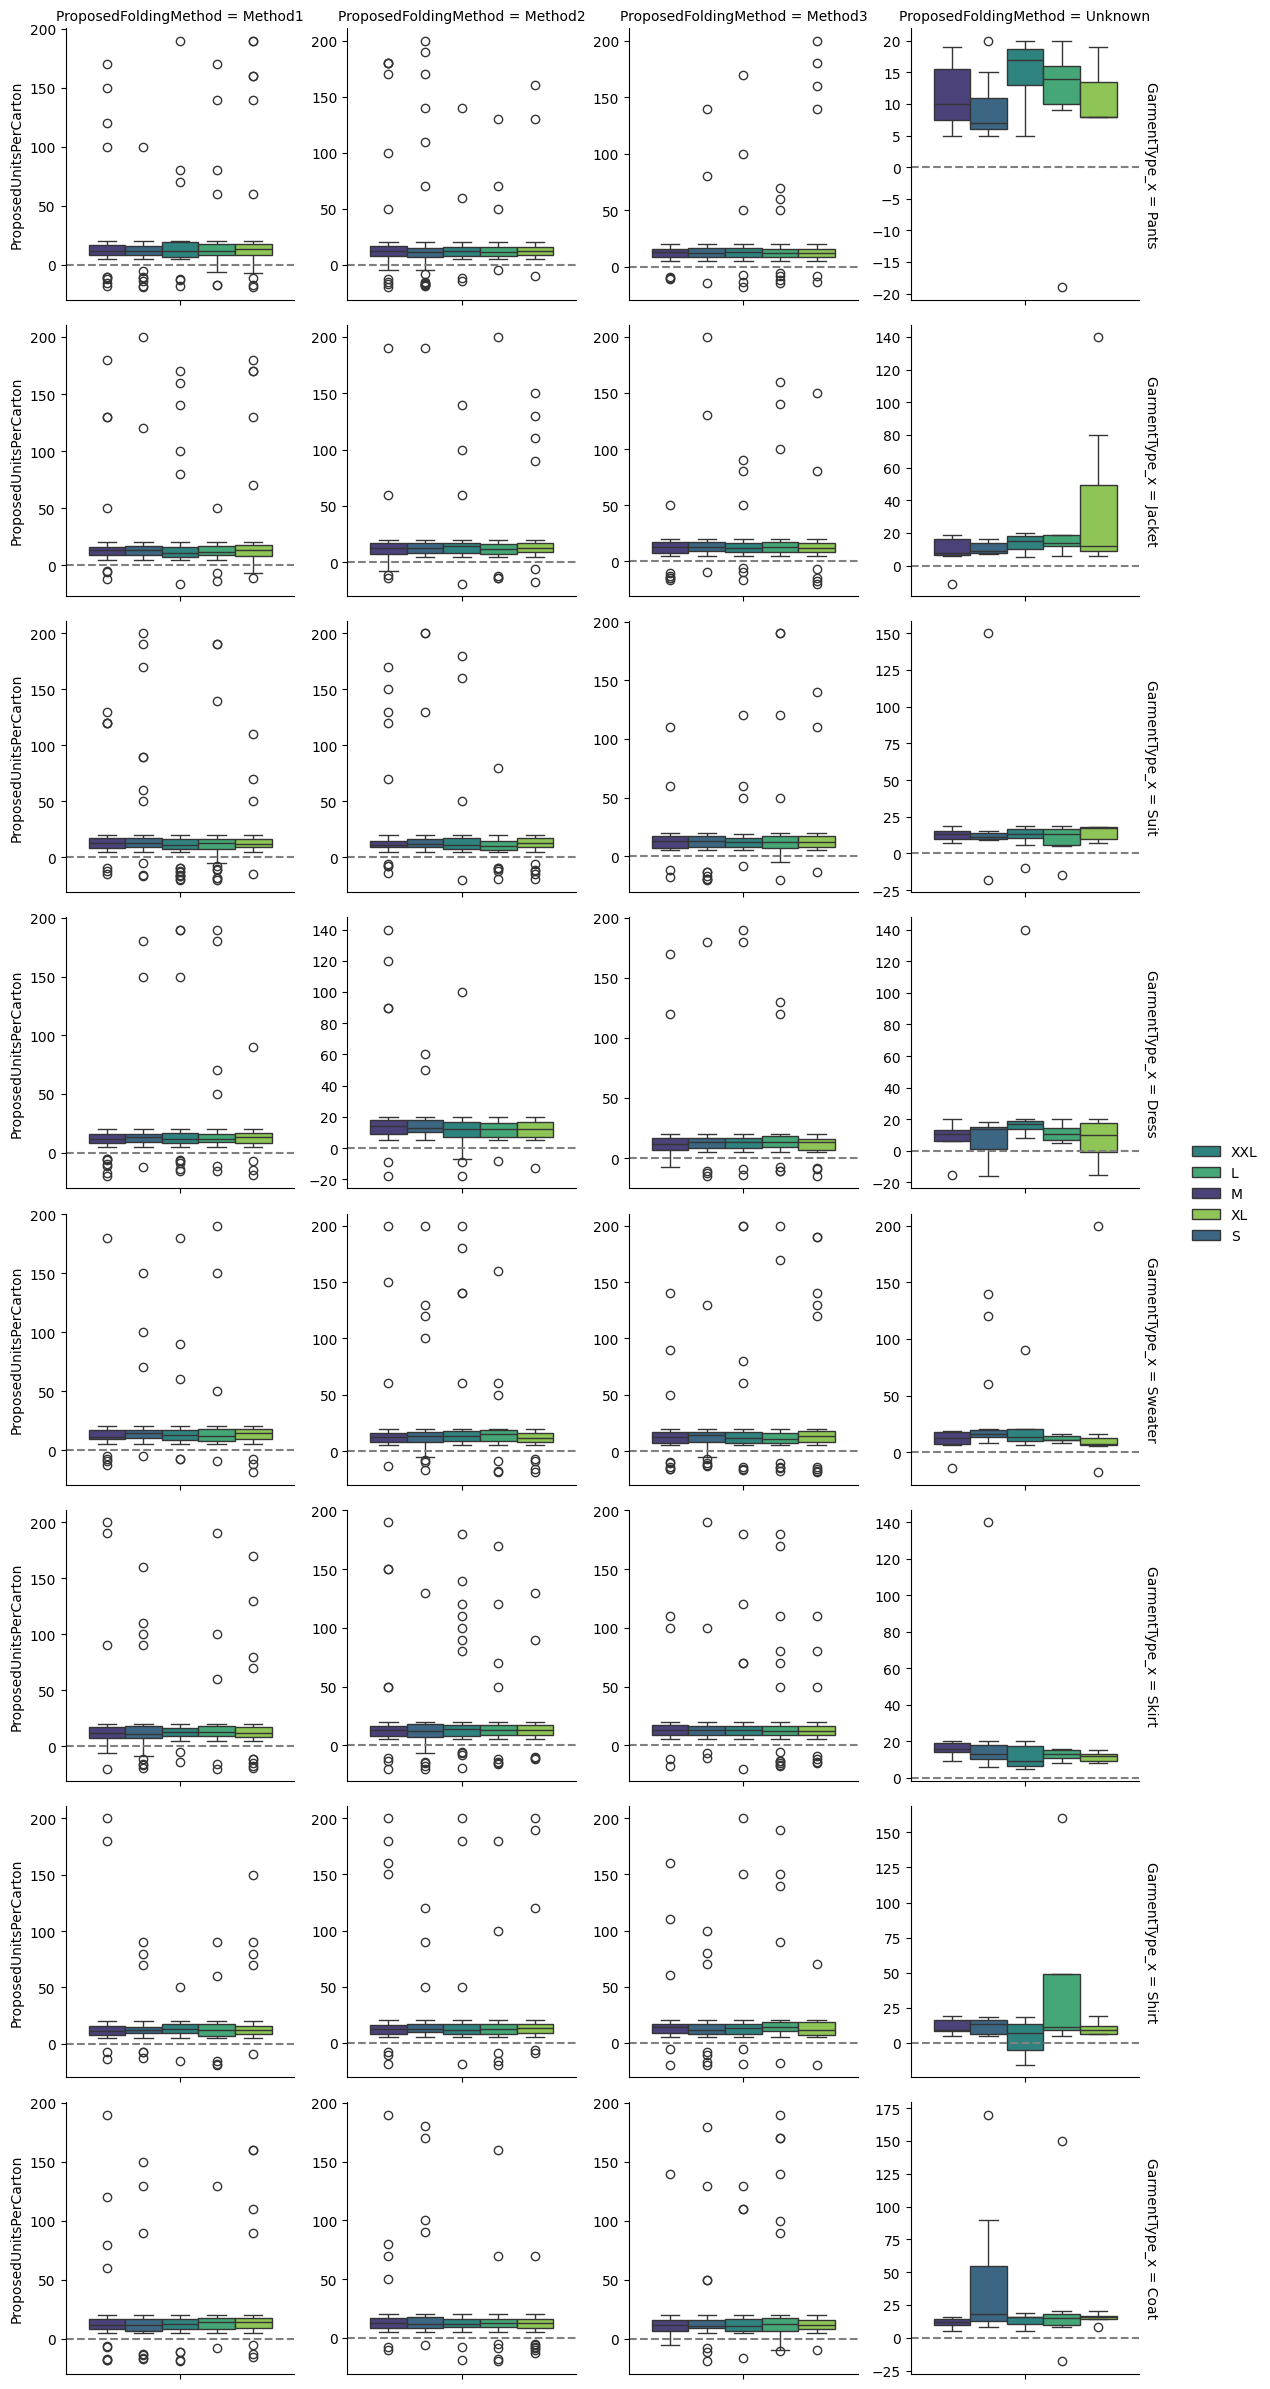

In [ ]:
boxplot_kwargs = {'palette':'viridis'}
g = sns.FacetGrid(main, col='ProposedFoldingMethod',row='GarmentType_x',margin_titles=True,sharey=False)
g.map_dataframe(sns.boxplot,y='ProposedUnitsPerCarton',hue='Size',**boxplot_kwargs)
g.refline(y=0)
g.add_legend()

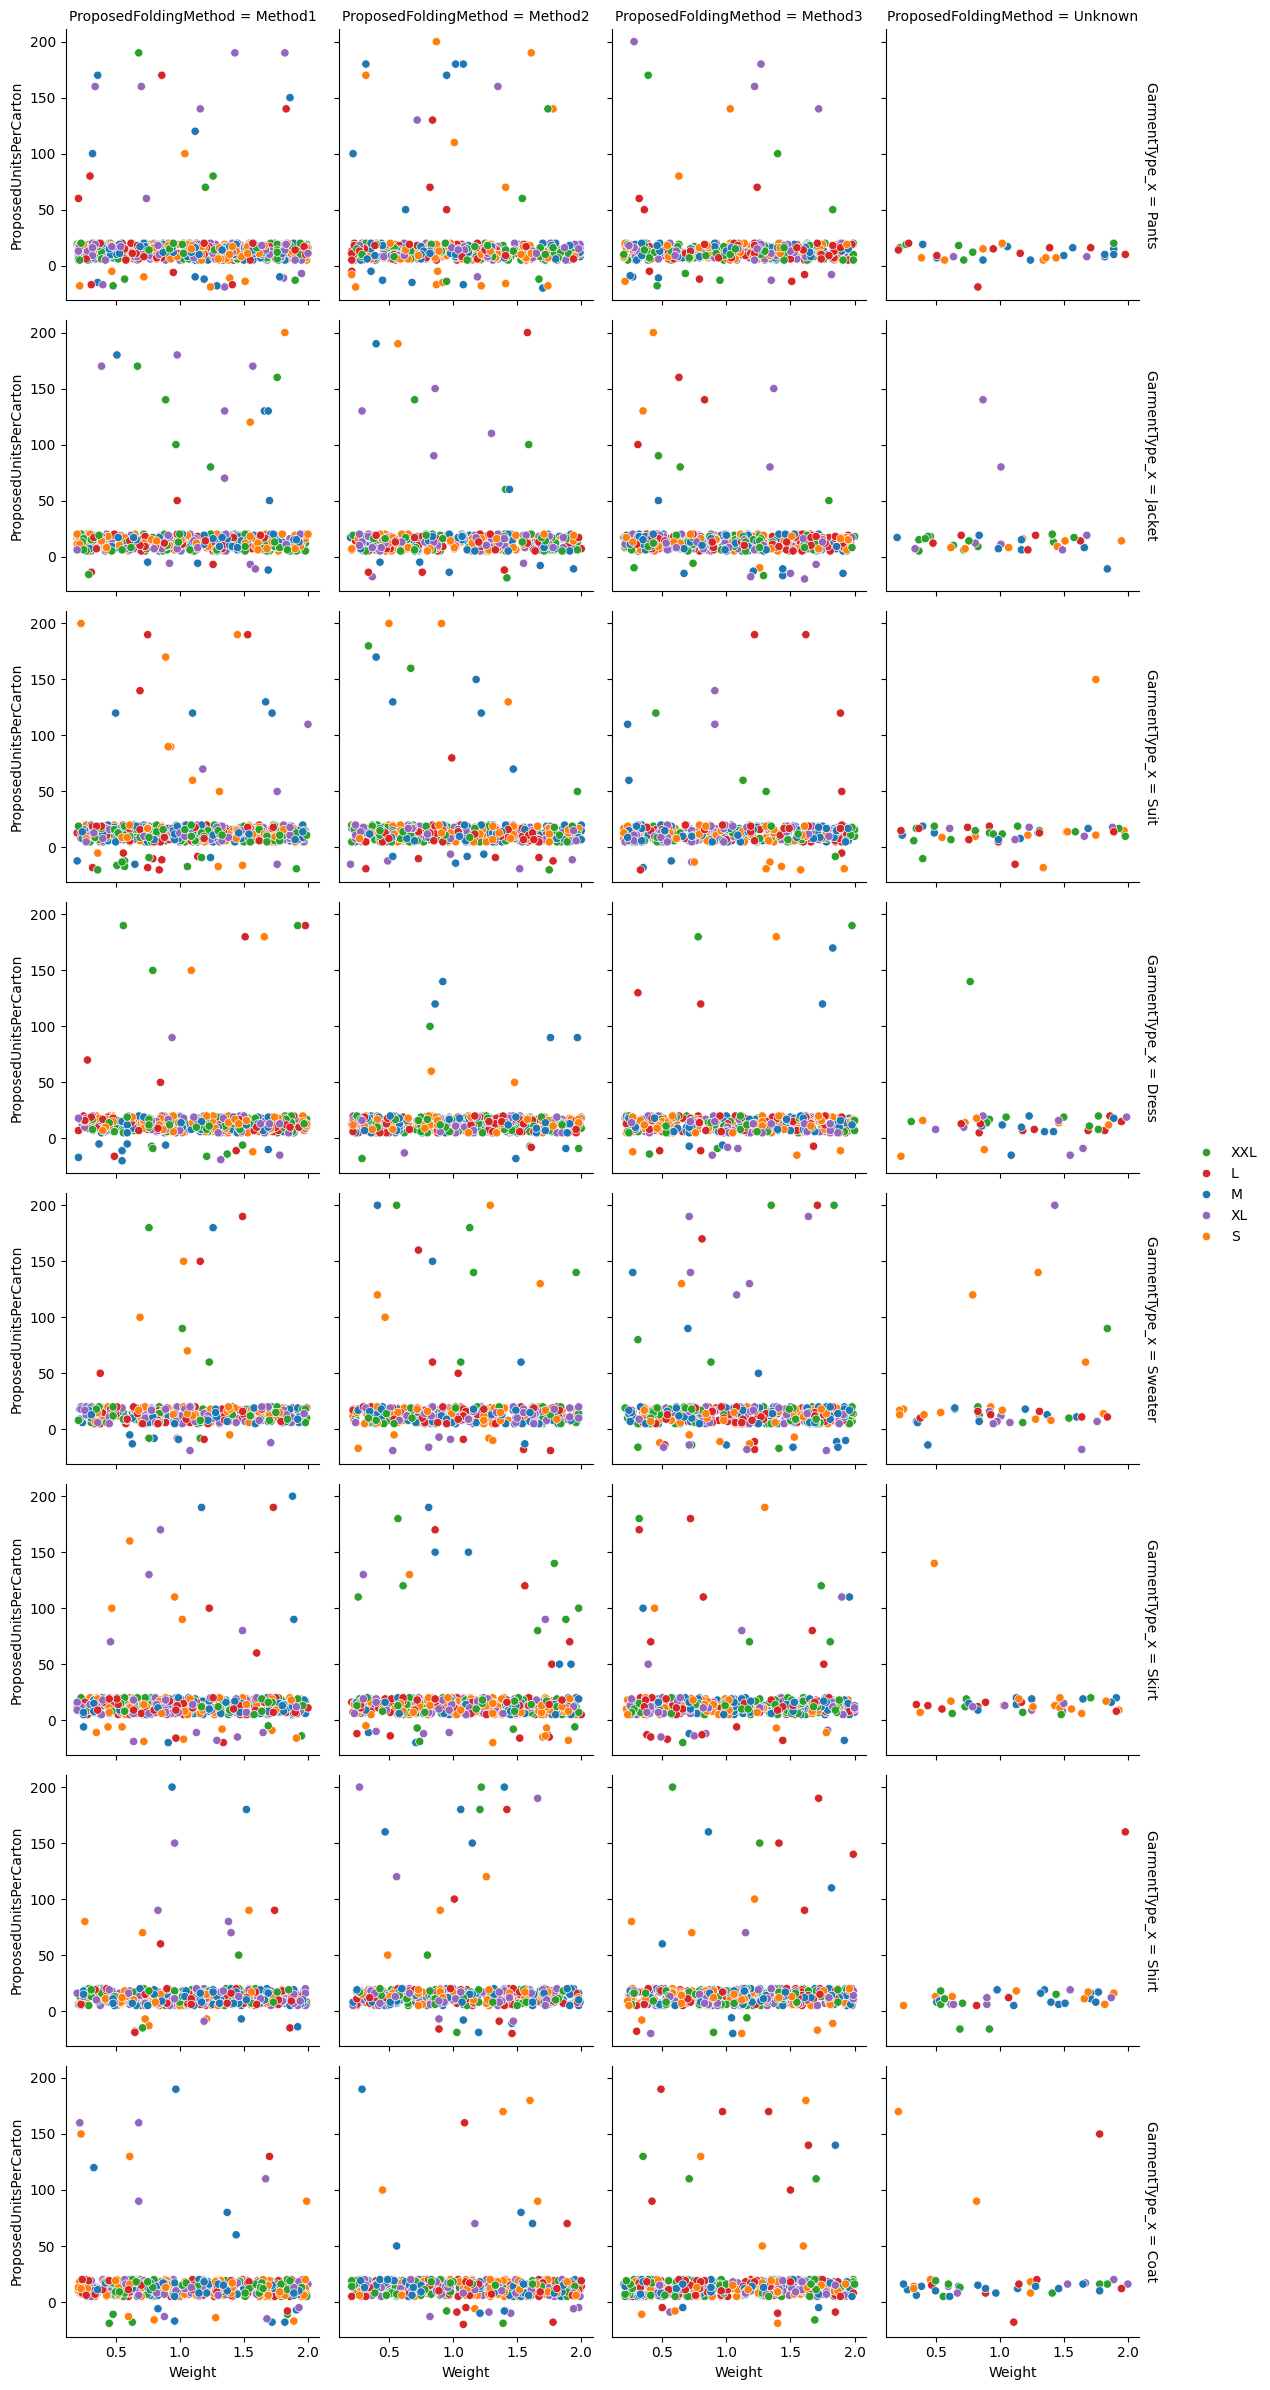

In [ ]:
g = sns.FacetGrid(main, col='ProposedFoldingMethod',row='GarmentType_x',margin_titles=True)
g.map_dataframe(sns.scatterplot,x='Weight',y='ProposedUnitsPerCarton',hue='Size')
g.add_legend()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[11427 rows x 0 columns]

In [ ]:
incidents.head()

IncidentID DateOfIncident SupplierName ProductReference IssueDescription  \
0           1     2023-06-29    SupplierC     SHI-POL-7646  Incorrect units   
1           2     2023-03-25    SupplierA     DRE-POL-2824  Incorrect units   
2           3     2024-03-16    SupplierB     SKI-WOO-4511  Damaged product   
3           4     2023-03-22    SupplierB     COA-WOO-7770  Damaged product   
4           5     2023-08-14    SupplierC     SHI-POL-5504  Packaging error   

  ResolutionStatus  CostImpact  
0      In Progress      516.77  
1      In Progress      368.65  
2      In Progress      784.42  
3      In Progress      770.32  
4      In Progress      140.48

In [ ]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   IncidentID        10000 non-null  int64         
 1   DateOfIncident    10000 non-null  datetime64[ns]
 2   SupplierName      10000 non-null  object        
 3   ProductReference  10000 non-null  object        
 4   IssueDescription  10000 non-null  object        
 5   ResolutionStatus  10000 non-null  object        
 6   CostImpact        10000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 547.0+ KB
